<a href="https://colab.research.google.com/github/AvChilds/mastersML/blob/main/masters_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🏡 **CFG +Masters Project: Serviced Accommodation in Essex - Analysis and Prediction**

## **1. INTRODUCTION**
This project dives into the world of **Serviced accommodation listings in Essex** with the goal of assisting a holiday lettings company select profitable properties to invest in based on historical Airbnb listing data.


### **1.1. Project Objective**

A holiday lettings company is on the lookout for promising properties across Essex to purchase. They are seeking data insights to select properties that can earn the highest income.

The aims of this project are:
- identify the features that mostly correlates with occupancy rates and annual revenue
- build a machine learning model that predicts which types of properties achieves the highest occupancy rates and revenue potential.

### **1.2. The Data**

The data is retrieved from real data acquired from PriceLabs (https://www.pricelabs.co), a subscription-based database often used by property investors that provides professionally managed datasets for existing and potential Airbnb businesses.

### **1.3. Phase 1 : Data Wrangling and Exploratory Data Analysis**

This first phase analysis will focus on the following:
- **Exploratory Data Analysis and Data cleaning**: To manage missing data, fixing outliers, handling duplicates etc.
- **Pre-processing and transformation**: Merging datasets, Encoding and transforming columns as needed.
- **Correlational Studies**


### **1.4. Features of the Study**

- **Airbnb Host features**: Reviews, professionally managed
- **Property Details**: Property type, number of bathrooms, number of occupants
- **Amenities**: seafront, hot-tub, pets allowed, smoking allowed
- **Listing features**: Minimum length of stays, active days, blocked days


### **1.5. Definitions**

| **Category** | **Feature**         | **Description**                                         | **Data Type**          |
|--------------|---------------------|---------------------------------------------------------|------------------------|
| Property     | Number of Bedrooms  | Total number of bedrooms in the property                | Discrete Numerical     |
|              | Number of Bathrooms | Total number of bathrooms in the property               | Discrete Numerical     |
|              | Number of Guests    | Maximum number of guests allowed                        | Discrete Numerical     |
|              | Location            | Town in Essex where the property is located             | Categorical            |
| Host         | Host Ratings        | Average rating of the host                              | Continuous Numerical   |
|              | Number of Reviews   | Total number of reviews received                        | Discrete Numerical     |
| Amenities    | Seafront            | Whether the property is near the sea                    | Binary Categorical     |
|              | Hot Tub             | Availability of a hot tub                               | Binary Categorical     |
|              | Pets Allowed        | Whether pets are permitted                              | Binary Categorical     |
|              | Smoking Allowed     | Whether smoking is permitted                            | Binary Categorical     |
| Listing      | Length of Stay      | Minimum or maximum nights per stay                      | Discrete Numerical     |
|              | Active Days         | Days the listing is live and bookable                   | Discrete Numerical     |
|              | Blocked Days        | Days the listing is unavailable                         | Discrete Numerical     |
|              | Price               | Nightly price of the listing                            | Continuous Numerical   |
|              | Average Daily Rate  | How much a listing makes on average per day             | Continuous Numerical   |

#### Target Variables

| **Variable**       | **Description**                                                       | **Data Type**          |
|--------------------|-----------------------------------------------------------------------|------------------------|
| Annual Revenue      | Total income generated per listing annually                          | Continuous Numerical   |
| Occupancy Rate      | % of booked days out of total active days (Booked ÷ Active × 100)    | Continuous Numerical   |


## **2. Module Requirements and Imports**

### **2.1 Import Python Modules**

In [67]:
#import libraries used for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split

### **2.2 Import and Merge Data Files**
There are 2 data files to import, one contains listing of 2-bed properties, and the other, 3-bed properties.

In [83]:
# import data files
airbnb_2bed = pd.read_csv("airbnb_essex_2bed.csv")   # please check and use your local file path
airbnb_2bed.head()

,listing_ID,town,est_rental_revenue_median,estimated_ADR,Est_adj_occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,Num_Reviews,beachfront,hot_tub,EV_charger,kitchen,pool,pets_allowed,smoking_allowed
0,1305239269239446863,Grays,0,NaN,0,42,NaN,NaN,NaN,3,...,11,NaN,0,No,No,No,Yes,No,No,No
1,1323330681470281939,Grays,0,NaN,0,25,NaN,NaN,NaN,1,...,25,5.0,1,No,No,No,Yes,No,No,No
2,960377081653062660,Grays,0,NaN,0,314,NaN,NaN,NaN,3,...,52,4.0,1,No,No,No,Yes,No,No,No
3,1270246391535349924,Grays,0,NaN,0,83,NaN,NaN,NaN,1,...,0,NaN,0,No,No,No,Yes,No,No,No
4,660855460760807240,Grays,0,NaN,0,363,NaN,NaN,Low,4,...,3,3.0,1,No,No,No,Yes,No,No,No


In [84]:
airbnb_3bed= pd.read_csv("airbnb_essex_3bed.csv")  # please check and use your local file path
airbnb_3bed.head()

,listing_ID,town,est_rental_revenue_median,estimated_ADR,Est_adj_occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,Num_Reviews,beachfront,hot_tub,EV_charger,kitchen,pool,pets_allowed,smoking_allowed
0,1205963819672225857,Southend-on-Sea,0,NaN,0,151,NaN,NaN,NaN,5,...,1,0.00,0,No,No,No,Yes,No,No,No
1,870111683833490126,Southend-on-Sea,0,NaN,0,138,NaN,NaN,NaN,14,...,56,0.00,0,No,No,No,Yes,No,No,No
2,46934205,Southend-on-Sea,0,NaN,0,101,NaN,NaN,NaN,1,...,171,4.71,7,No,No,No,Yes,No,No,No
3,987440215251843897,Southend-on-Sea,0,NaN,0,187,NaN,NaN,NaN,3,...,179,4.55,0,No,No,No,Yes,No,No,No
4,1011456380483308029,Southend-on-Sea,0,NaN,0,78,NaN,NaN,High,1,...,63,NaN,0,No,No,No,Yes,No,No,No


In [85]:
#checking data of both data files

airbnb_2bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listing_ID                 879 non-null    int64  
 1   town                       879 non-null    object 
 2   est_rental_revenue_median  879 non-null    int64  
 3   estimated_ADR              817 non-null    float64
 4   Est_adj_occupancy          879 non-null    int64  
 5   active_days                879 non-null    int64  
 6   booking_window             817 non-null    float64
 7   length_of_stay             817 non-null    float64
 8   dynamic_pricing            470 non-null    object 
 9   min_stay                   879 non-null    int64  
 10  management                 879 non-null    object 
 11  Bedrooms                   879 non-null    int64  
 12  bathrooms                  879 non-null    float64
 13  max_guests                 879 non-null    int64  

In [86]:
airbnb_3bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listing_ID                 452 non-null    int64  
 1   town                       452 non-null    object 
 2   est_rental_revenue_median  452 non-null    int64  
 3   estimated_ADR              400 non-null    float64
 4   Est_adj_occupancy          452 non-null    int64  
 5   active_days                452 non-null    int64  
 6   booking_window             400 non-null    float64
 7   length_of_stay             400 non-null    float64
 8   dynamic_pricing            240 non-null    object 
 9   min_stay                   452 non-null    int64  
 10  management                 452 non-null    object 
 11  Bedrooms                   452 non-null    int64  
 12  bathrooms                  452 non-null    float64
 13  max_guests                 452 non-null    int64  

*Both datasets have a 26 columns of features (i.e not including the listing IDs) which are identical.  12 of these are contain string values, the rest are numeric columns.*

In [87]:
#Combining both datasets to create one datafram: as there are the same columns, the datasets can be concatetenated.

data = pd.concat([airbnb_2bed, airbnb_3bed], ignore_index=True)
data.shape


(1331, 27)

The dataset now as 1331 rows and 27 columns of data.

## **3. Data Exploration and Cleaning**

### **3.1. Column standardisation**

In [88]:
#Checking columns of the dataset
data.columns

Index(['listing_ID', 'town', 'est_rental_revenue_median', 'estimated_ADR',
       'Est_adj_occupancy', 'active_days', 'booking_window', 'length_of_stay',
       'dynamic_pricing', 'min_stay', 'management', 'Bedrooms', 'bathrooms',
       'max_guests', 'listed_price', 'is_active', 'economic_Category',
       'blocked_days', 'rating', 'Num_Reviews', 'beachfront', 'hot_tub',
       'EV_charger', 'kitchen', 'pool', 'pets_allowed', 'smoking_allowed'],
      dtype='object')

In [89]:
#standardising column names to lowercase
data.columns = data.columns.str.lower()

print(f"Columns in dataset :{data.columns.values}")


Columns in dataset :['listing_id' 'town' 'est_rental_revenue_median' 'estimated_adr'
 'est_adj_occupancy' 'active_days' 'booking_window' 'length_of_stay'
 'dynamic_pricing' 'min_stay' 'management' 'bedrooms' 'bathrooms'
 'max_guests' 'listed_price' 'is_active' 'economic_category'
 'blocked_days' 'rating' 'num_reviews' 'beachfront' 'hot_tub' 'ev_charger'
 'kitchen' 'pool' 'pets_allowed' 'smoking_allowed']


In [90]:
#renaming of columns for readability

data.rename(columns = {'est_rental_revenue_median': 'year_revenue', 'estimated_adr':'avg_daily_rate', 'est_adj_occupancy':'occupancy'}, inplace=True)

In [91]:
#checking change in column names
print(f"Columns in dataset :{data.columns.values}")

Columns in dataset :['listing_id' 'town' 'year_revenue' 'avg_daily_rate' 'occupancy'
 'active_days' 'booking_window' 'length_of_stay' 'dynamic_pricing'
 'min_stay' 'management' 'bedrooms' 'bathrooms' 'max_guests'
 'listed_price' 'is_active' 'economic_category' 'blocked_days' 'rating'
 'num_reviews' 'beachfront' 'hot_tub' 'ev_charger' 'kitchen' 'pool'
 'pets_allowed' 'smoking_allowed']


### **3.2. Managing Duplicates**

Duplicates (based on listing_id) in the dataset can occur as one property can feature within 2 neighbourhoods.


In [92]:
# Exploring duplicates
data[data.duplicated(subset=['listing_id'], keep=False)]

,listing_id,town,year_revenue,avg_daily_rate,occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,991120607387030667,Grays,92,92.39,0,366,48.0,1.0,NaN,1,...,0,0.00,0,No,No,No,Yes,No,No,No
24,1339734188104641921,Grays,689,86.08,15,54,7.0,6.0,NaN,2,...,58,NaN,0,No,No,No,Yes,No,No,No
32,1029075368162869978,Grays,1398,93.19,19,79,14.0,4.0,NaN,3,...,281,NaN,0,No,No,No,Yes,No,No,No
34,1313627075795796786,Grays,1805,75.21,44,55,37.0,7.0,NaN,4,...,93,NaN,0,No,No,No,Yes,No,No,No
38,1339093830414323513,Grays,2025,84.36,42,57,5.0,5.0,Low,1,...,39,NaN,0,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,867428043609660988,Brentwood,0,NaN,0,180,NaN,NaN,NaN,7,...,186,0.00,0,No,No,No,Yes,No,Yes,No
1179,809501303830183077,Brentwood,7775,97.19,71,112,26.0,43.0,NaN,2,...,194,5.00,4,No,No,No,Yes,No,No,No
1180,725823036821709871,Brentwood,7859,145.54,15,363,42.0,5.0,NaN,2,...,3,3.83,6,No,No,No,Yes,No,No,No
1190,872913740243580186,Brentwood,51017,147.45,98,352,75.0,18.0,NaN,1,...,14,5.00,23,No,No,Yes,Yes,No,No,No


In [93]:
#dropping any duplicates, keeping the first occurence
data = data.drop_duplicates(subset='listing_id', keep='first')

In [94]:
#checking the remaining data after dropping duplicates
data.shape

(1236, 27)

There are now a total of 1236 rows of data

### **3.3. Feature Relevance**

One of the primary use of PriceLabs data is for agents and airbnb owners to determine listing prices. The columns (features) "booking_window" and "dynamic_pricing" are used to determine listing prices, and not our target outcome variables of  revenue or occupancy.  They are therefore is not relevant to our analysis. These columns/ features are excluded from our study.

In [95]:
data.drop(columns=['listing_id','booking_window','dynamic_pricing'],inplace=True )

### **3.4 Exploring and Managing Missing and Zero Values**

<Axes: title={'center': 'Heatmap of Missing Values'}>

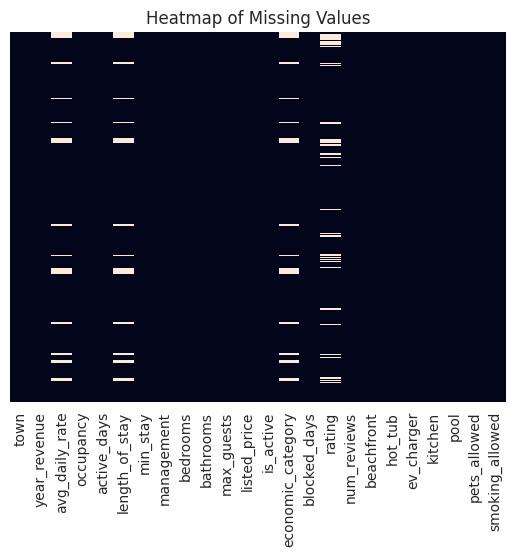

In [96]:
#Analysing patterns and distributions of missing values in the data using a heatmap
plt.title('Heatmap of Missing Values')
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

In [97]:
print("Columns with missing values are:")
print(data.isnull().sum()[data.isnull().sum() > 0])

Columns with missing values are:
avg_daily_rate       110
length_of_stay       110
economic_category    110
rating               144
dtype: int64


The main columns with missing values are "avg_daily_rate", "length_of_stay", "economic_category" and "rating".  

It also appears that there are exactly the same number of missing values (110) for 3 columns - avg_daily_rate, length_of_stay and economic_category, appearing along the same rows (listings).

In [98]:
# analysing these rows further, checking the values for target variables occupancy and annual revenue

mask = data[['avg_daily_rate', 'length_of_stay', 'economic_category']].isnull().all(axis=1)

In [99]:
data[mask][['occupancy', 'year_revenue']].describe()

,occupancy,year_revenue
count,110.0,110.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


This table confirms that these 110 rows also do not contain data for rental revenue and occupancy which suggests either the properties did not have rental data available or were not rented out during the preceeed 365 days. These rows will therefore be excluded from the study.

#### **Managing Zero Revenue**

In [100]:
#exploring zero values for target variable
data[(data['year_revenue'] == 0)]

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
0,Grays,0,NaN,0,42,NaN,3,Small,2,2.0,...,11,NaN,0,No,No,No,Yes,No,No,No
1,Grays,0,NaN,0,25,NaN,1,Small,2,2.0,...,25,5.0,1,No,No,No,Yes,No,No,No
2,Grays,0,NaN,0,314,NaN,3,Individual,2,2.5,...,52,4.0,1,No,No,No,Yes,No,No,No
3,Grays,0,NaN,0,83,NaN,1,Individual,2,1.0,...,0,NaN,0,No,No,No,Yes,No,No,No
4,Grays,0,NaN,0,363,NaN,4,Small,2,1.5,...,3,3.0,1,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,Grays,0,NaN,0,94,NaN,1,Small,3,3.0,...,76,0.0,0,No,No,No,Yes,No,No,No
1256,Grays,0,NaN,0,52,NaN,1,Large,3,1.0,...,35,3.5,0,No,No,No,Yes,No,No,No
1257,Grays,0,NaN,0,183,NaN,3,Large,3,1.5,...,183,NaN,0,No,No,No,Yes,No,Yes,No
1258,Grays,0,NaN,0,127,NaN,3,Large,3,2.0,...,187,4.5,0,No,No,No,Yes,No,No,No


In [101]:
# selecting rows where revenue is not equals to 0.
data = data[data['year_revenue'] != 0]
data.head(5)

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,Grays,92,92.39,0,366,1.0,1,Individual,2,1.0,...,0,0.00,0,No,No,No,Yes,No,No,No
21,Grays,567,113.31,4,136,5.0,4,Moderate,2,1.0,...,3,NaN,0,No,No,No,Yes,No,Yes,No
22,Grays,597,119.41,10,49,5.0,1,Large,2,2.0,...,96,4.42,0,No,No,No,Yes,No,No,No
23,Grays,627,156.73,13,30,4.0,2,Moderate,2,2.0,...,43,5.00,4,No,No,No,Yes,No,No,No
24,Grays,689,86.08,15,54,6.0,2,Large,2,1.0,...,58,NaN,0,No,No,No,Yes,No,No,No


In [102]:
#checking for other anomalies
data.describe()

,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,blocked_days,rating,num_reviews
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1029.000000,1126.000000
mean,14183.282416,111.085444,58.397869,219.482238,11.089698,3.057726,2.351687,1.431616,5.022202,136.517762,67.636767,4.583703,26.719361
std,11384.073480,50.895556,26.713322,98.945584,8.887841,5.232144,0.477709,0.562324,1.349385,65.237925,64.608389,0.876289,48.672669
min,66.000000,24.570000,0.000000,17.000000,1.000000,1.000000,2.000000,0.000000,2.000000,28.000000,0.000000,0.000000,0.000000
25%,5385.250000,82.625000,41.000000,132.000000,4.000000,2.000000,2.000000,1.000000,4.000000,99.250000,16.000000,4.610000,2.000000
50%,11957.000000,101.125000,63.000000,229.500000,8.000000,2.000000,2.000000,1.000000,5.000000,124.000000,47.000000,4.860000,8.000000
75%,19980.750000,125.387500,79.000000,310.000000,15.750000,3.000000,3.000000,2.000000,6.000000,154.750000,102.000000,5.000000,27.000000
max,82579.000000,719.980000,100.000000,366.000000,59.000000,90.000000,3.000000,4.000000,11.000000,955.000000,324.000000,5.000000,431.000000


#### **Managing Zero Occupancy**

In [103]:
#looking for zero values in occupancy

occupancy_zero = data[data['occupancy'] == 0]
occupancy_zero

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,Grays,92,92.39,0,366,1.0,1,Individual,2,1.0,...,0,0.0,0,No,No,No,Yes,No,No,No
1199,Clacton-on-Sea,89,88.83,0,256,1.0,2,Individual,3,1.5,...,110,0.0,0,No,No,No,Yes,Yes,Yes,Yes


There is only 2 rows showing 0 occupancy rate. Both also have **ratings** of zero which may suggest either data anomaly, or these are newly listed properties without historical data. These rows will be removed.

In [104]:
data = data[data['occupancy'] != 0].copy()

#### **Managing Zero Ratings and Number of Reviews**

In [105]:
# checking for missing values
print("Remaining column with missing values are:")
print(data.isnull().sum()[data.isnull().sum() > 0])

Remaining column with missing values are:
rating    97
dtype: int64


Now the only column left with missing values is the 'Rating' column with 97 missing values.

In [106]:
#Checking Ratings = 0

zero_rating= data[data['rating'] == 0]
zero_rating

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
40,Grays,2620,58.23,68,66,17.0,2,Unknown,2,1.0,...,58,0.0,0,No,No,No,Yes,No,Yes,No
57,Grays,8163,74.21,97,113,18.0,10,Individual,2,2.0,...,253,0.0,0,No,No,No,Yes,No,No,No
71,Grays,11990,92.94,53,242,4.0,2,Small,2,1.0,...,60,0.0,0,No,No,No,Yes,No,No,No
108,Southend-on-Sea,700,116.64,2,359,1.0,1,Individual,2,1.0,...,7,0.0,0,No,No,No,Yes,No,No,No
110,Southend-on-Sea,811,135.19,5,111,18.0,3,Small,2,1.0,...,9,0.0,0,No,No,No,Yes,No,No,No
112,Southend-on-Sea,1471,98.10,5,294,2.0,1,Small,2,1.0,...,72,0.0,0,No,Yes,No,Yes,No,No,No
136,Southend-on-Sea,4651,35.78,55,237,5.0,1,Individual,2,1.0,...,129,0.0,0,No,No,No,Yes,No,No,No
251,Chelmsford,4211,100.27,44,95,36.0,3,Individual,2,1.0,...,114,0.0,0,No,No,No,Yes,No,Yes,Yes
292,Chelmsford,19583,264.64,95,78,2.0,5,Small,2,1.0,...,288,0.0,0,No,No,No,Yes,No,No,No
349,Brentwood,6460,86.13,90,83,12.0,7,Individual,2,1.0,...,155,0.0,0,No,No,No,Yes,No,Yes,No


There are 23 rows where ratings = 0.

It appears that despite some properties have had successful listings and generating revenue, ratings and number of reviews remain zero. This points to possible anomaly or a default value of zero for missing values in these columns. This will need to be managed.

In [108]:
#checking if there are any invalid rating values (i.e  >5)
over_five = data[data["rating"] > 5]
over_five

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed


In [109]:
# replacing problematic values for 'rating'

valid_ratings = data["rating"][(data["rating"] >= 1)]

In [110]:
#calculating median, and replacing NaNs and zeros with the median rating
median_rating=valid_ratings.median()
data["rating"] = data["rating"].apply(lambda x: median_rating if pd.isna(x) or x == 0 else x)


In [111]:
#checking if this has resolved zero rating
zero_rating= data[data['rating'] == 0]
zero_rating

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed


In [112]:
# replacing problematic values for 'rating'

valid_num_reviews = data["num_reviews"][(data["num_reviews"] >= 1)]

In [113]:
#calculating median, and replacing NaNs and zeros with the median rating
median_reviews=valid_num_reviews.median()
data["num_reviews"] = data["num_reviews"].apply(lambda x: median_rating if pd.isna(x) or x == 0 else x)

In [114]:
#checking if this has resolved zero rating
zero_rating= data[data['num_reviews'] == 0]
zero_rating

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed


#### **Checking outcome of cleaning missing values**

<Axes: title={'center': 'Missing Values (after data cleaning)'}>

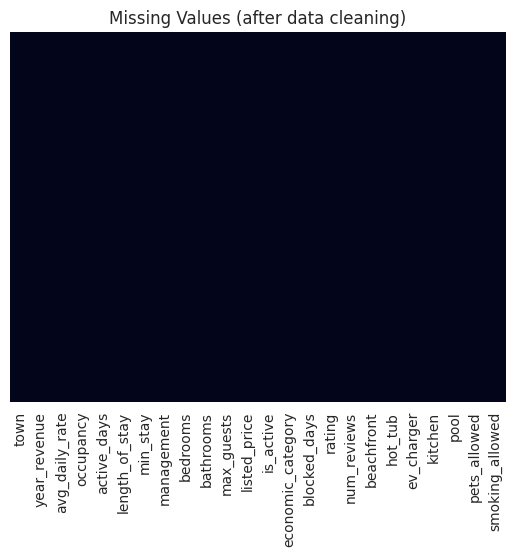

In [115]:
#checking effectiveness of removing null values in the dataset.
plt.title('Missing Values (after data cleaning)')
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

Checking missing values on the dataset using a heatmap - shows that there are no longer missing/NaN values in the dataset.

#### **Zero Values - Bathroom**

In [116]:
zero_bathroom= data[data['bathrooms'] == 0]
zero_bathroom

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
259,Chelmsford,7969,122.60,31,213,9.0,1,Individual,2,0.0,...,153,4.96,24.0,No,No,No,Yes,No,No,No
391,Brentwood,27524,108.36,71,359,19.0,1,Small,2,0.0,...,7,4.64,42.0,No,No,No,Yes,No,No,No
468,Colchester,7011,56.09,60,208,22.0,2,Small,2,0.0,...,78,5.00,4.0,No,No,Yes,Yes,No,No,No
1212,Clacton-on-Sea,2952,105.43,13,212,4.0,2,Individual,3,0.0,...,145,4.57,7.0,No,No,No,Yes,No,Yes,No


There are 4 row with 0 bathrooms

In [32]:
print(data['bathrooms'].value_counts())

bathrooms
1.0    603
2.0    248
1.5    180
2.5     60
3.0     25
0.0      4
4.0      3
3.5      1
Name: count, dtype: int64


As there are only 4 listings without bathrooms, we have decided to use the mode (most frequently occuring value) to replace the zero values as it is assumed that these properties are most likely to have this number of bathrooms.

In [117]:
bathroom_mode = data['bathrooms'].mode()[0]
print("Mode of bathrooms:", bathroom_mode)

Mode of bathrooms: 1.0


In [118]:
#Replace zero values with the mode
data['bathrooms'] = data['bathrooms'].replace(0, bathroom_mode)
print(data['bathrooms'].value_counts()) # checking if zero values are now replaced

bathrooms
1.0    607
2.0    248
1.5    180
2.5     60
3.0     25
4.0      3
3.5      1
Name: count, dtype: int64


### **3.5. Numerical Data: Exploring and Managing Outliers**

In [119]:
# looking at descriptive statistics of numerical data
data.describe()

,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,blocked_days,rating,num_reviews
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,14208.358541,111.121877,58.501779,219.319395,11.107651,3.060498,2.351423,1.435498,5.020463,136.580961,67.659253,4.715151,27.389537
std,11378.646570,50.933460,26.623074,98.930957,8.885538,5.236345,0.477627,0.556731,1.347313,65.272739,64.622022,0.475457,48.386498
min,66.000000,24.570000,1.000000,17.000000,1.000000,1.000000,2.000000,1.000000,2.000000,28.000000,0.000000,1.000000,1.000000
25%,5424.250000,82.605000,41.000000,132.000000,4.000000,2.000000,2.000000,1.000000,4.000000,99.750000,16.000000,4.680000,4.860000
50%,11969.500000,101.165000,63.000000,229.000000,8.000000,2.000000,2.000000,1.000000,5.000000,124.000000,47.000000,4.860000,8.000000
75%,19984.000000,125.407500,79.000000,310.000000,16.000000,3.000000,3.000000,2.000000,6.000000,155.000000,102.000000,4.990000,27.000000
max,82579.000000,719.980000,100.000000,366.000000,59.000000,90.000000,3.000000,4.000000,11.000000,955.000000,324.000000,5.000000,431.000000


Outliers in this study could be caused by the following:

Our target variables for this study are annual revenue (**year_revenue**) and occupancy rate (**occupancy**), the rest are independent variables ('features') for this study. There is a signicant difference between the max value and the 75th percentiles for both these values which suggest possible outliers or data anomalies which will need further analysis

Within the features, there are also larger at expected intervals between 75th percentile and max values for the following: **avg_daily_rate**, **length_of_stay**, **min_stay**, **listed_price**, **blocked_days**, **num_reviews**. These will also be looked at more closely to determine if these are possible data errors or listing errors.

A minimum occupancy of 0 and min revenue of £66 are contradictory. Zero minimum values for **bathrooms** and **ratings** also need further investigation as neither of these can contain zero values

#### Exploring Outliers with Boxplots

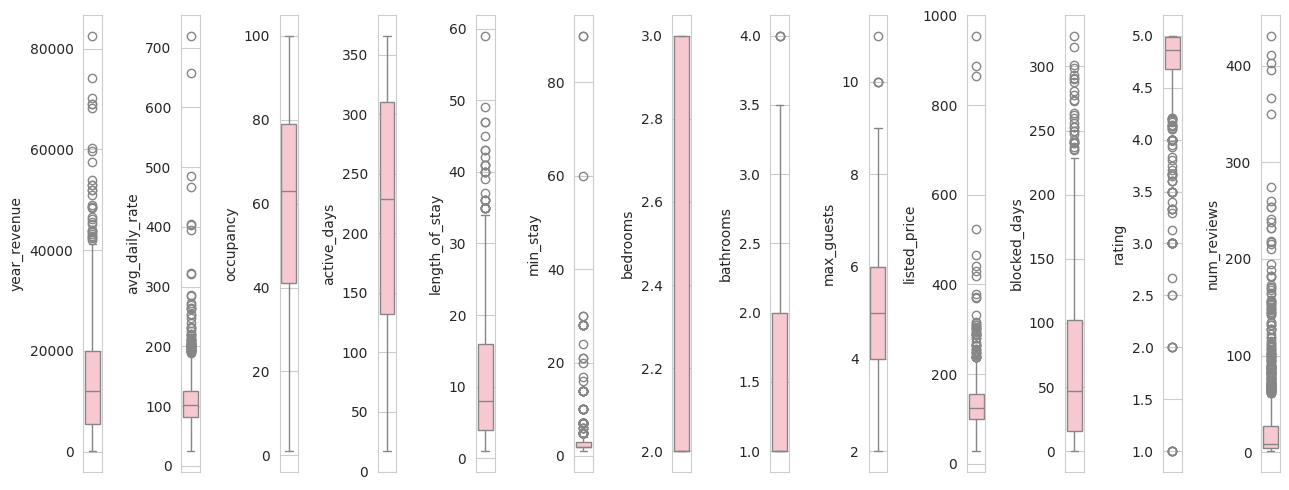

In [121]:
# Get numeric columns only, excluding 'listing_id'
numeric_cols = data.select_dtypes(include='number').columns
l = numeric_cols.values
# Set number of plots per row (columns of the figure grid)
number_of_columns = len(l)
number_of_rows=1

plt.figure(figsize=(number_of_columns, 5*number_of_rows))

for i, col in enumerate(l):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(data=data[col], color='pink', orient='v')

    plt.tight_layout()

plt.show()

Boxplots display the median, interquartile range (IQR) and any data points that fall outside of 1.5 *IQR from the lower or uppoer quartiles(shown as circles).

Observations:
 1. year_revenue and avg_daily_rate, listed price:
 Both variables exhibit several high-value outliers, likely representing luxury or premium listings. These extreme values can disproportionately influence regression models. To address this, transformation techniques such as log-scaling or capping via winsorization may be necessary.

 2. min_stay, blocked_days:
These features contain notable outliers, including unusually long stay requirements and listings blocked for most of the year. Such anomalies may not reflect typical booking behaviour and could distort model outcomes or reduce predictive reliability. Removing or adjusting these entries may improve data quality and model performance.




#### **Managing Outliers Using Winsorization**

In [122]:
#Using winsorization for outlier management
winsor_cols = ['year_revenue', 'avg_daily_rate', 'listed_price']

for col in winsor_cols:
    data[col] = winsorize(data[col], limits=[0.01, 0.01])

#### **Managing Outliers Using Thresholds**

In [123]:
# Using threshold caps
#min stay for serviced accommodation  set at 7 days

min_stay_count = data[data['min_stay'] > 7].shape[0]
print(f"Listings with min_stay > 7 days: {min_stay_count}")

Listings with min_stay > 7 days: 39


In [124]:
#min blocked days - 225 days
blocked_days_count = data[data['blocked_days'] > 225].shape[0]
print(f"Listings with blocked_days > 225 days: {blocked_days_count}")

Listings with blocked_days > 225 days: 33


In [125]:
data_filtered = data[(data['min_stay'] <= 7) & (data['blocked_days'] <= 225)]

In [126]:
print(f"Original dataset size: {data.shape[0]}")
print(f"Filtered dataset size: {data_filtered.shape[0]}")

Original dataset size: 1124
Filtered dataset size: 1054


In [127]:
data = data_filtered


In [128]:
# Checking outcomes of outlier management
data.describe()

,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,blocked_days,rating,num_reviews
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,14437.970588,110.416746,58.422201,223.360531,10.618596,2.355787,2.362429,1.438805,5.047438,134.805503,61.523719,4.713814,27.955750
std,10975.175865,40.724808,26.432755,98.208855,8.366185,1.375260,0.480930,0.562607,1.338178,49.073787,55.601220,0.470203,48.228355
min,267.000000,47.210000,1.000000,17.000000,1.000000,1.000000,2.000000,1.000000,2.000000,58.000000,0.000000,1.000000,1.000000
25%,5634.250000,82.815000,41.000000,138.250000,4.000000,1.000000,2.000000,1.000000,4.000000,100.000000,16.000000,4.670000,4.860000
50%,12490.500000,101.940000,63.000000,234.000000,8.000000,2.000000,2.000000,1.000000,5.000000,125.000000,43.000000,4.860000,9.000000
75%,20623.500000,125.982500,78.000000,313.000000,14.000000,3.000000,3.000000,2.000000,6.000000,155.000000,96.000000,4.980000,28.000000
max,52944.000000,272.970000,100.000000,366.000000,59.000000,7.000000,3.000000,4.000000,11.000000,331.000000,225.000000,5.000000,431.000000


### **3.6. Exploring Categorical Features**

In [129]:
# examining columns with categorical data

categorical_cols = [
    'town', 'management', 'is_active', 'economic_category',
    'beachfront', 'hot_tub', 'ev_charger', 'kitchen',
    'pool', 'pets_allowed', 'smoking_allowed'
]

# Summary info for each categorical column
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(data[col].value_counts(dropna=False))
    print(f"Unique Values: {data[col].nunique()}")


Column: town
town
Colchester         295
Southend-on-Sea    216
Clacton-on-Sea     142
Grays              118
Chelmsford         114
Brentwood           64
Walton-on-Naze      59
Saffron-Walden      46
Name: count, dtype: int64
Unique Values: 8

Column: management
management
Small         371
Individual    361
Moderate      175
Large         137
Unknown        10
Name: count, dtype: int64
Unique Values: 5

Column: is_active
is_active
Yes    770
No     284
Name: count, dtype: int64
Unique Values: 2

Column: economic_category
economic_category
Midscale    631
Upscale     320
Economy     103
Name: count, dtype: int64
Unique Values: 3

Column: beachfront
beachfront
No     1048
Yes       6
Name: count, dtype: int64
Unique Values: 2

Column: hot_tub
hot_tub
No     1011
Yes      43
Name: count, dtype: int64
Unique Values: 2

Column: ev_charger
ev_charger
No     1034
Yes      20
Name: count, dtype: int64
Unique Values: 2

Column: kitchen
kitchen
Yes    1023
No       31
Name: count, dtype: int

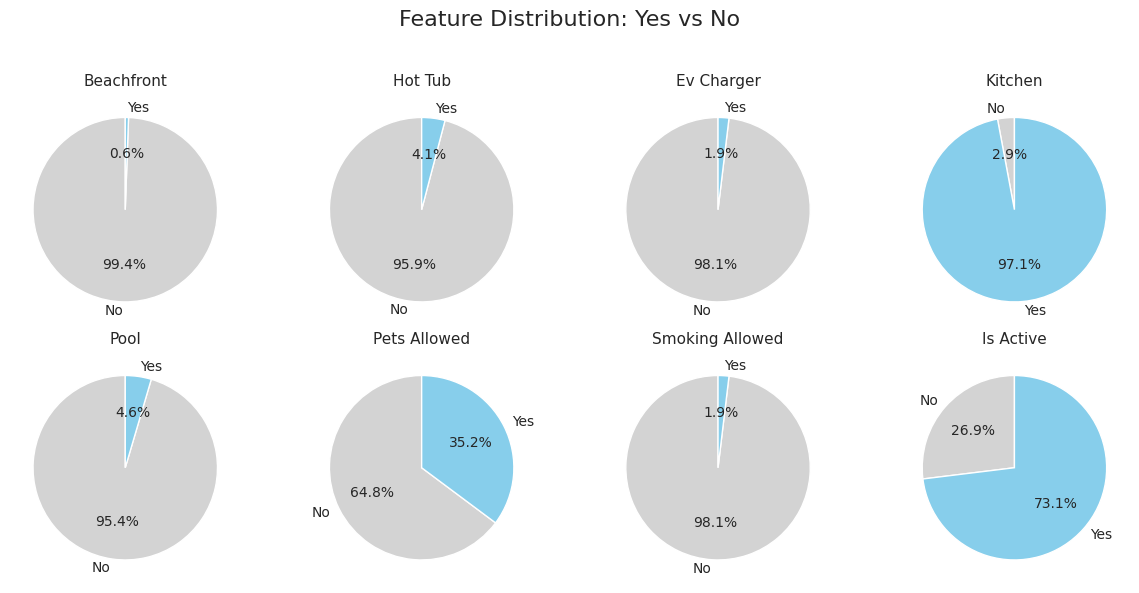

In [131]:
# Piecharts to look at distribution/proportion of outcomes

binary_features = {
    'beachfront': [1048, 6],
    'hot_tub': [1011, 43],
    'ev_charger': [1034, 20],
    'kitchen': [31, 1023],
    'pool': [1006, 48],
    'pets_allowed': [683, 371],
    'smoking_allowed': [1034, 20],
    'is_active': [284, 770]
}

labels = ['No', 'Yes']
colors = ['lightgrey', 'skyblue']

# Set up subplot grid
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for i, (feature, values) in enumerate(binary_features.items()):
    ax = axes[i]
    ax.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    ax.set_title(feature.replace('_', ' ').title(), fontsize=11)

# Adjust layout
plt.suptitle('Feature Distribution: Yes vs No', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

There appears to be some large class imbalances within the binary features. Most noticeable is "Beachfront" and "Ev Charger" and "Smoking Allowed". These skews in proportion may render the analysis of these features insignficant and should be taken into further consideration in Phase 2  when building a machine learning model.

## **4. Correlational Studies Between Features and Target Variables**


### **4.1. Annual Revenue**

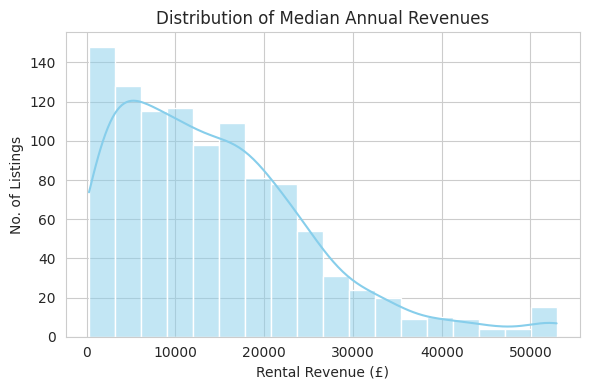

In [132]:
#Visualising distributions

plt.figure(figsize=(6, 4))

sns.histplot(x=data['year_revenue'], kde=True, color='skyblue')
plt.title('Distribution of Median Annual Revenues')
plt.xlabel('Rental Revenue (£)')
plt.ylabel('No. of Listings')

plt.tight_layout()
plt.show()

In [133]:
# looking at the top 10 listings with highest revenues:
data[data['year_revenue']>40000].sort_values(by='year_revenue', ascending=False).head(10)

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
623,Colchester,52944,201.33,100,350,7.0,2,Large,2,2.0,...,16,5.00,6.00,No,No,No,Yes,No,No,No
622,Colchester,52944,192.79,99,313,6.0,1,Large,2,1.5,...,49,5.00,3.00,No,Yes,No,Yes,No,Yes,No
621,Colchester,52944,147.57,100,366,5.0,3,Small,2,2.0,...,0,5.00,4.00,No,Yes,No,Yes,No,Yes,No
620,Colchester,52944,272.97,95,138,3.0,2,Large,2,1.0,...,6,4.67,3.00,No,Yes,No,Yes,No,Yes,No
1161,Colchester,52944,210.89,95,286,2.0,1,Large,3,2.0,...,80,5.00,4.00,No,No,No,Yes,No,Yes,No
1162,Colchester,52944,231.36,98,304,5.0,2,Large,3,3.0,...,62,5.00,1.00,No,No,No,Yes,No,Yes,No
1160,Colchester,52944,177.78,91,326,5.0,2,Individual,3,2.0,...,40,4.85,144.00,No,No,No,Yes,No,Yes,No
1307,Grays,52944,272.97,70,366,2.0,1,Individual,3,1.5,...,0,4.86,4.86,No,No,No,Yes,No,No,Yes
680,Saffron-Walden,52944,188.33,100,362,5.0,3,Moderate,2,1.0,...,4,5.00,4.00,No,No,No,Yes,No,Yes,No
681,Saffron-Walden,52944,272.97,61,354,2.0,2,Small,2,2.5,...,12,5.00,11.00,No,Yes,Yes,Yes,No,No,No


It can be observed that properties with high revenue have relatively high average daily rates and occupancies (above 70%). This may suggest  that these outliers may be genuine high performing properties.


In [139]:
# Exploring listings with lowest revenues:
data[data['year_revenue']<12000].sort_values(by='year_revenue', ascending=True).head(15)

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed,revenue_group
690,Clacton-on-Sea,267,64.15,2,161,2.0,2,Individual,2,1.0,...,4.86,4.86,No,No,No,Yes,Yes,Yes,No,Low
798,Walton-on-Naze,267,182.71,1,69,1.0,1,Small,2,1.0,...,4.86,1.00,No,No,No,Yes,No,Yes,No,Low
898,Southend-on-Sea,267,107.80,2,56,1.0,1,Individual,3,1.5,...,5.00,4.86,No,No,No,Yes,No,No,No,Low
1260,Grays,267,108.68,1,164,1.0,1,Small,3,1.0,...,4.33,6.00,No,No,No,Yes,No,No,No,Low
241,Chelmsford,267,131.05,2,55,1.0,2,Large,2,1.0,...,5.00,2.00,No,No,No,Yes,No,No,No,Low
1200,Clacton-on-Sea,267,117.29,7,30,2.0,1,Small,3,2.0,...,4.86,4.86,No,No,No,Yes,Yes,No,No,Low
899,Southend-on-Sea,267,133.46,1,190,1.0,1,Individual,3,1.0,...,5.00,1.00,No,No,No,Yes,No,No,No,Low
328,Brentwood,267,85.42,3,35,1.0,1,Small,2,2.0,...,4.86,4.86,No,No,No,Yes,No,No,No,Low
412,Colchester,267,65.21,2,159,1.0,1,Small,2,1.0,...,5.00,1.00,No,No,No,Yes,No,No,No,Low
410,Colchester,267,66.24,1,177,1.0,4,Moderate,2,1.0,...,4.86,4.86,No,No,No,Yes,No,Yes,No,Low


In [140]:
low_rev = data[data['year_revenue'] < 12500]
high_rev = data[data['year_revenue'] >= 12500]

print(f"{len(high_rev)} listings are at 50th percentile of revenue (threshold = £12500)")

526 listings are at 50th percentile of revenue (threshold = £12500)


In [141]:
#creating a comparison table of features from low vs high revenue

summary = pd.DataFrame({
    'Low Revenue (<12500)':low_rev.mean(numeric_only=True),
    'High Revenue (≥12500)': high_rev.mean(numeric_only=True)
})
display(summary.style.format("{:.2f}"))

,Low Revenue (<12500),High Revenue (≥12500)
year_revenue,5956.09,22952.10
avg_daily_rate,101.54,119.33
occupancy,45.00,71.90
active_days,163.48,283.46
length_of_stay,10.81,10.42
min_stay,2.37,2.34
bedrooms,2.36,2.37
bathrooms,1.39,1.49
max_guests,4.97,5.12
listed_price,125.57,144.08


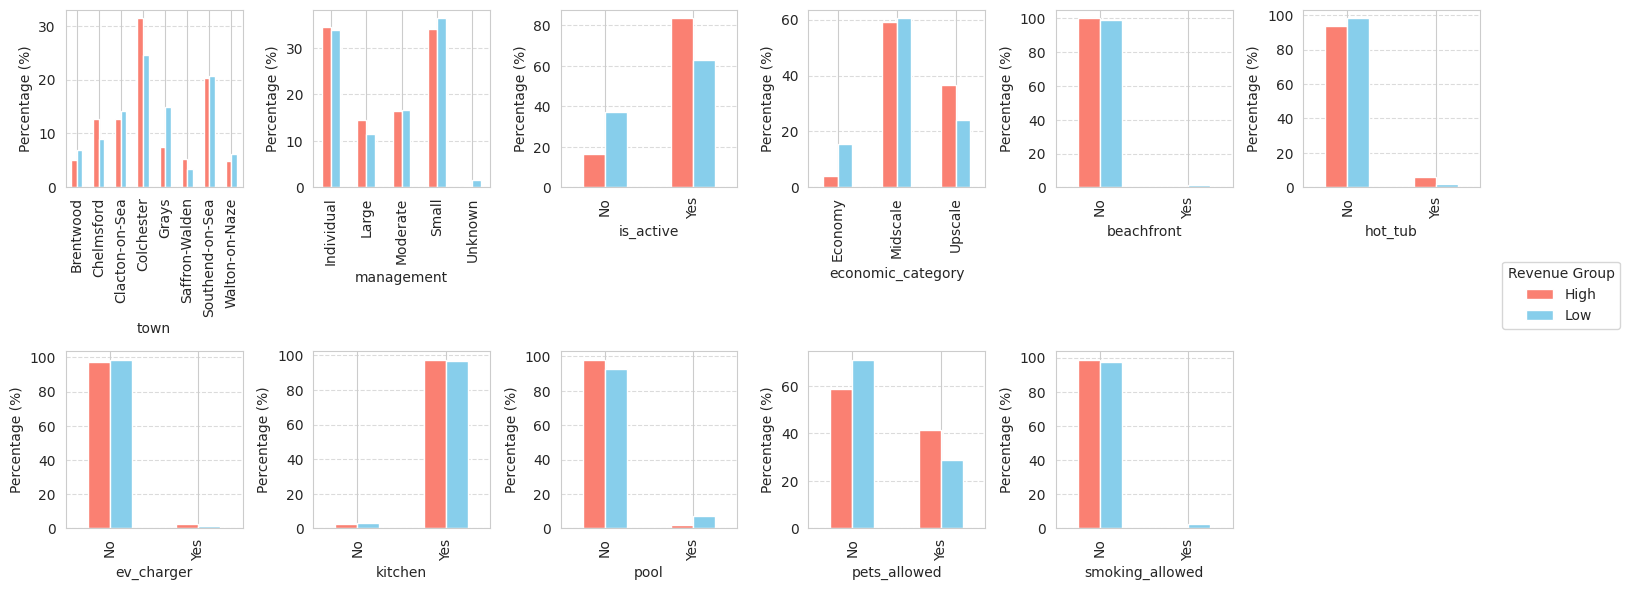

In [138]:
threshold = 12500
data['revenue_group'] = data['year_revenue'].apply(
    lambda x: 'High' if x >= threshold else 'Low'
)
n_cols = 6
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

# Plot bar charts
for i, col in enumerate(categorical_cols):
    group_dist = pd.crosstab(data[col], data['revenue_group'], normalize='columns') * 100
    group_dist = group_dist.round(2)
    group_dist.plot(kind='bar', ax=axes[i], color=['salmon', 'skyblue'], legend=False)


    axes[i].set_ylabel('Percentage (%)')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), title='Revenue Group')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **Findings - Revenue vs Categorical Features**
Higher annual revenues are associated with:
- Chelmsford and Colchester areas
- Management by larger organisations
- Active listings
- Upscale economic category
- Availability of a hot tub
- No pool
- Pets allowed


It is however important to note that due to the imbalance of featuredata, it would be difficult to determine significance in these relationships, especially for the availablity of the EV Charger, smoking and beachfront features.

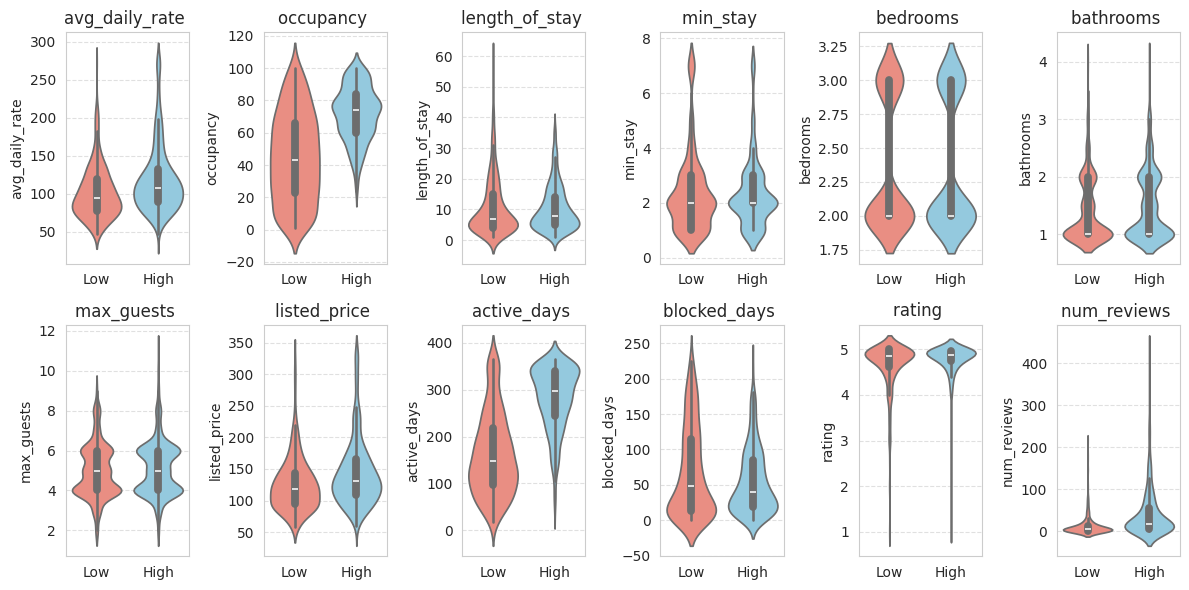

In [54]:
numerical_cols = [
    'avg_daily_rate', 'occupancy', 'length_of_stay', 'min_stay', 'bedrooms',
    'bathrooms', 'max_guests', 'listed_price', 'active_days', 'blocked_days',
    'rating', 'num_reviews'
]
n_cols = 6
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()


for i, col in enumerate(numerical_cols):
    sns.violinplot(x='revenue_group', y=col, data=data, ax=axes[i], hue='revenue_group', palette=['salmon', 'skyblue'], legend=False)
    axes[i].set_title(f'{col} ')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.6)

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



#### **Findings for Revenue vs Numerical Features**
Observations for higher revenue yielding properties:
- higher average daily rate
- higher occupancy
- higher number of active days
- lower length of stay
- higher listed price
- less blocked days
- higher number of reviews

Out of these, there appears to be more significance within the "Active Days" and "Occupancy" which is unsurprising as Revenue is computated using these values.


### **4.2. Occupancy Rates**

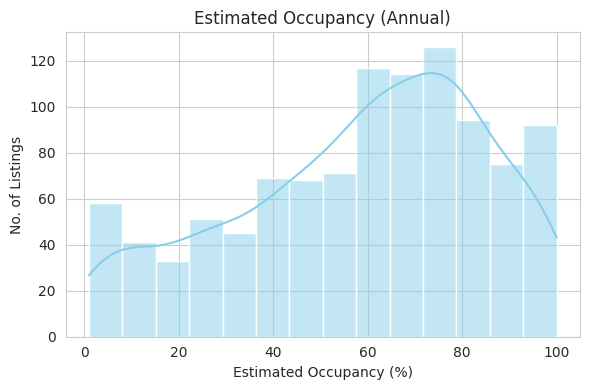

In [142]:
#Observing the descriptive stats for  Occupancy
plt.figure(figsize=(6, 4))

sns.histplot(x=data['occupancy'], kde=True, color='skyblue')
plt.title('Estimated Occupancy (Annual)')
plt.xlabel('Estimated Occupancy (%)')
plt.ylabel('No. of Listings')

plt.tight_layout()
plt.show()

In [143]:
data['occupancy'].describe()

,occupancy
count,1054.000000
mean,58.422201
std,26.432755
min,1.000000
25%,41.000000
50%,63.000000
75%,78.000000
max,100.000000


In [146]:
# analysing low occupancy listings, using median value of 63%
low_occupancy_threshold = 63
low_occupancy = data[data['occupancy'] < low_occupancy_threshold]

print(f"{len(low_occupancy)} listings have occupancy < {low_occupancy_threshold}%")
display(low_occupancy.sort_values(by='occupancy'))

524 listings have occupancy < 63%


,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed,revenue_group
1260,Grays,267,108.68,1,164,1.0,1,Small,3,1.0,...,4.33,6.00,No,No,No,Yes,No,No,No,Low
900,Southend-on-Sea,428,213.88,1,184,2.0,2,Individual,3,1.0,...,4.86,4.86,No,No,No,Yes,No,No,No,Low
798,Walton-on-Naze,267,182.71,1,69,1.0,1,Small,2,1.0,...,4.86,1.00,No,No,No,Yes,No,Yes,No,Low
799,Walton-on-Naze,376,75.23,1,361,5.0,3,Individual,2,1.5,...,4.50,10.00,No,No,No,Yes,Yes,Yes,No,Low
899,Southend-on-Sea,267,133.46,1,190,1.0,1,Individual,3,1.0,...,5.00,1.00,No,No,No,Yes,No,No,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Colchester,9318,75.76,62,198,19.0,2,Individual,2,1.0,...,5.00,14.00,No,No,No,Yes,Yes,No,No,Low
144,Southend-on-Sea,6430,98.92,62,105,18.0,1,Individual,2,1.0,...,4.80,20.00,No,No,No,Yes,No,Yes,No,Low
221,Southend-on-Sea,23357,105.69,62,355,11.0,3,Moderate,2,1.0,...,5.00,1.00,No,No,No,Yes,No,Yes,No,High
1219,Clacton-on-Sea,6910,77.64,62,144,6.0,2,Individual,3,2.0,...,4.59,27.00,Yes,No,No,Yes,Yes,Yes,Yes,Low


In [148]:
low_occ = data[data['occupancy'] < 63]
high_occ = data[data['occupancy'] >= 63]


In [150]:
#using this thresholds to create comparison table.
summary = pd.DataFrame({
    'Low Occupancy (<63%)':low_occ.mean(numeric_only=True),
    'High Occupancy (≥63%)': high_occ.mean(numeric_only=True)
})
display(summary.style.format("{:.2f}"))

,Low Occupancy (<63%),High Occupancy (≥63%)
year_revenue,9487.01,19332.88
avg_daily_rate,112.80,108.06
occupancy,36.69,79.90
active_days,219.02,227.65
length_of_stay,8.84,12.37
min_stay,2.30,2.42
bedrooms,2.40,2.32
bathrooms,1.44,1.44
max_guests,5.19,4.91
listed_price,138.03,131.62


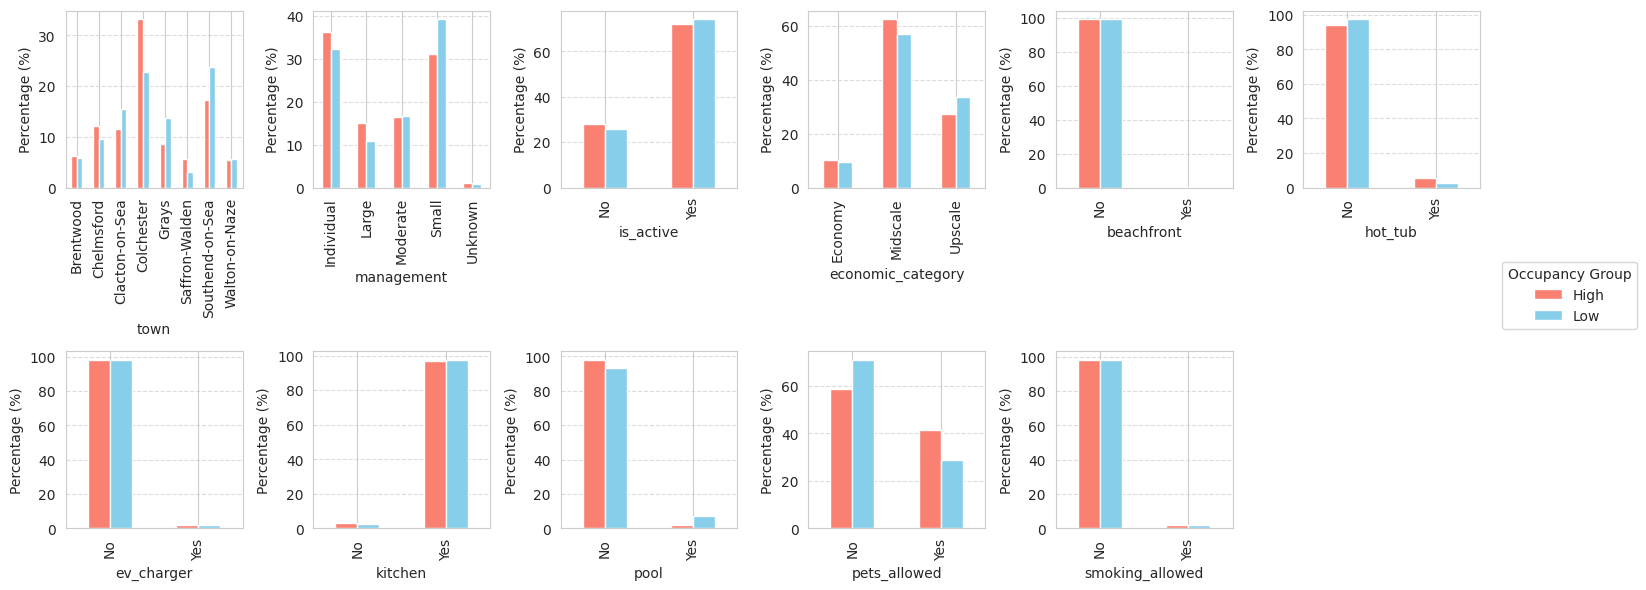

In [152]:
# visualising categorical features

threshold = 63
data['occupancy_group'] = data['occupancy'].apply(
    lambda x: 'High' if x >= threshold else 'Low'
)
n_cols = 6
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

# Plot bar charts
for i, col in enumerate(categorical_cols):
    group_dist = pd.crosstab(data[col], data['occupancy_group'], normalize='columns') * 100
    group_dist = group_dist.round(2)
    group_dist.plot(kind='bar', ax=axes[i], color=['salmon', 'skyblue'], legend=False)


    axes[i].set_ylabel('Percentage (%)')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), title='Occupancy Group')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **Findings - Occupancy vs Categorical Features**
Higher occupancy appears to be accociated with the following categorical data:
- Chemlsford and Colchester
- Economic Cateogory: Midscale
- Management: Individuals or large companies
- Availabilty of a hot tub
- No pool
- Pets allowed

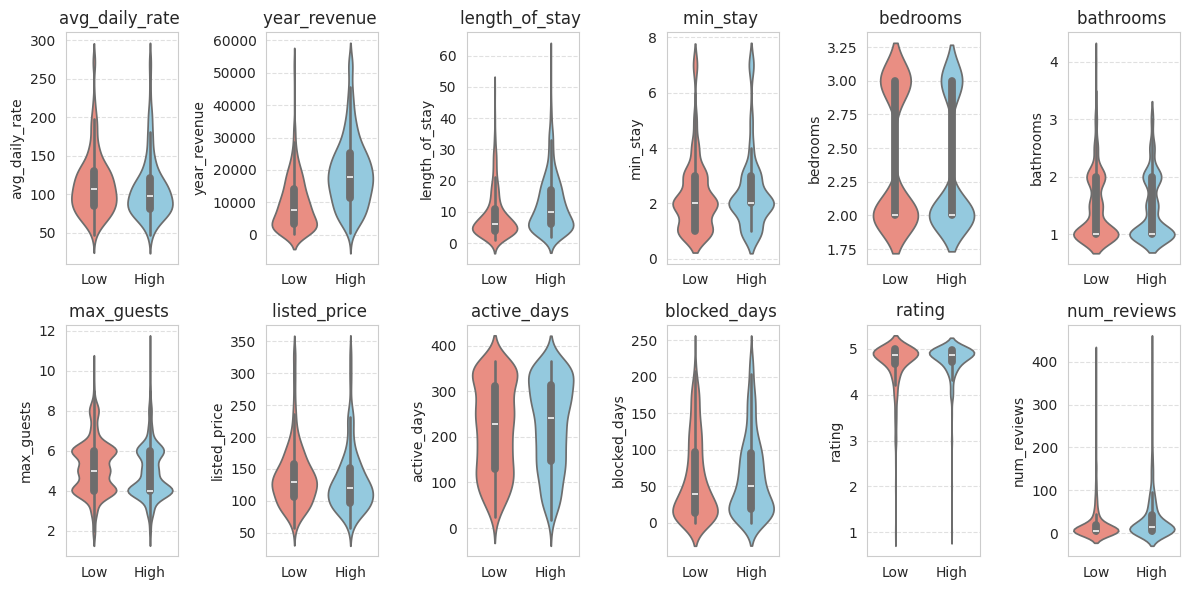

In [153]:
numerical_cols = [
    'avg_daily_rate', 'year_revenue', 'length_of_stay', 'min_stay', 'bedrooms',
    'bathrooms', 'max_guests', 'listed_price', 'active_days', 'blocked_days',
    'rating', 'num_reviews'
]
n_cols = 6
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(x='occupancy_group', y=col, data=data, ax=axes[i], hue='occupancy_group', palette=['salmon', 'skyblue'], legend=False)
    axes[i].set_title(f'{col} ')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.6)

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Higher occupancy is associated with
- lower average daily rate
- higher active days (i.e listings)
- higher length of stays
- less bedrooms
- lower maximum guests
- lower listed price
- higher number of reviews

There does not appear to be any significant difference between 2 and 3 bedroom properties or number of bathrooms.

In [62]:
data.to_csv('data_cleaned.csv', index=False)

### **4.3 Correlation Coefficients**


#### Data Pre-processing

In [63]:
data_encoded = data.copy()

In [64]:
from sklearn import preprocessing

for x in data_encoded.columns:
    if data_encoded[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder() # encoding
        lbl.fit(list(data_encoded[x].values)) # fitting the model
        data_encoded[x] = lbl.transform(list(data_encoded[x].values)) # transforming into various integer codes

### Heatmaps

<Axes: title={'center': 'Heatmap of Serviced Accommodation Variables with Occupancy'}>

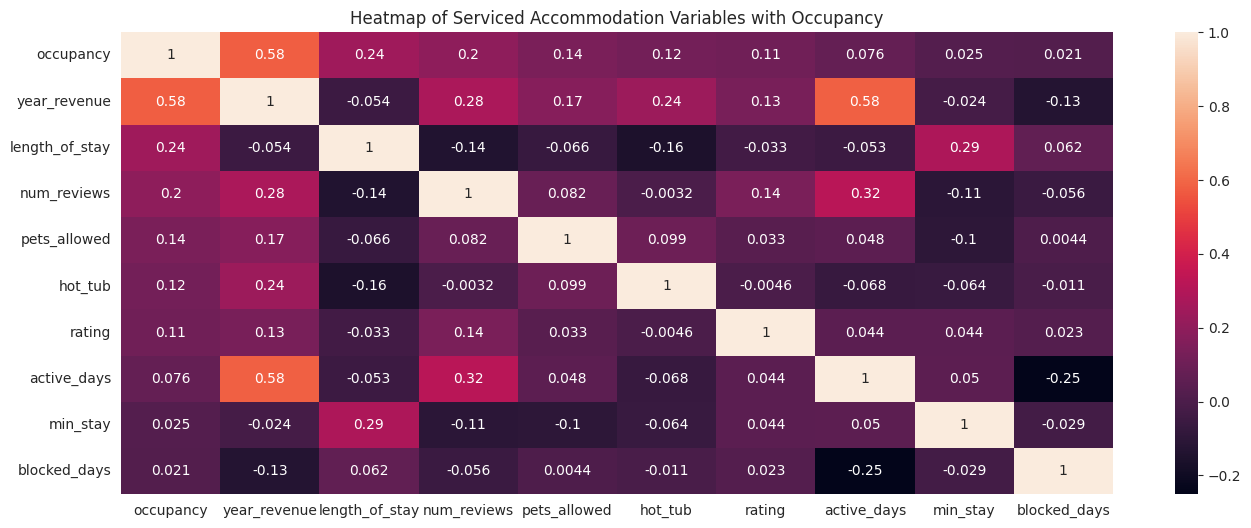

In [65]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
plt.title('Heatmap of Serviced Accommodation Variables with Occupancy')


#Quality correlation matrix

k = 10  # number of variables for heatmap # want to just pick out the top 12
cols = data_encoded.corr().nlargest(k, 'occupancy')['occupancy'].index  # method
cm = data_encoded[cols].corr()

sns.heatmap(cm, annot=True)

Occupancy: the features that appear to be the most correlated are  number of reviews and length of stay


<Axes: title={'center': 'Heatmap of Serviced Accommodation Variables vs Revenue'}>

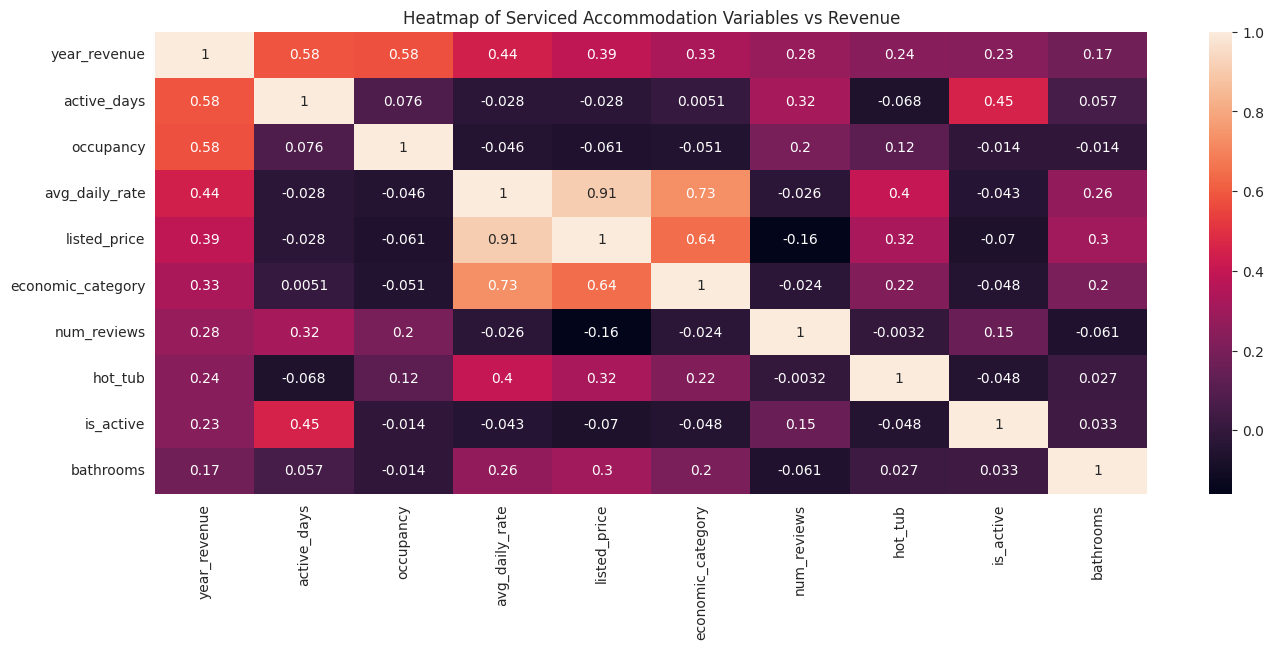

In [66]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
plt.title('Heatmap of Serviced Accommodation Variables vs Revenue')


#Quality correlation matrix

k =10  # number of variables for heatmap # want to just pick out the top 12
cols = data_encoded.corr().nlargest(k, 'year_revenue')['year_revenue'].index  # method
cm = data_encoded[cols].corr()

sns.heatmap(cm, annot=True)

Annual revenue: Highest correlation occurs with the number of active days listed, average daily rate and listed price, economic category  and number of reviews.

### **4.4 Summary of Findings**


Whilst calculating correlational coefficients have not show strong correlations between property features, occupancy rates and annual revenue, some patterns have emerged.

**Property Features**
Chelmsford and Colchester appear to be the most likely areas of higher occupancy rates and higher annual return.
There is no evidence to show that more bedrooms, beachfront properties or availablility of a pool or EV charger on the properties will yield better earnings.
There is some weak evidence that the availability of a hot-tub, properties considered within a higher economic bracket, more bathrooms and pet-friendly may be slightly more profitable.

**Listing and Host Features**
Listed price and average daily rate of a property has the strongest relationship with revenue but does not impact occupancy rates. For both target variables, the listing has a positive correlationship with occupancy and revenue, suggesting that customers are more likely to book  a property if that property has had a record of reviews. However, rating has a weak correlation between both groups.


#**Phase 2 - Machine Learning - Predictive Modelling**

## **5. Introduction**

In phase 2, we will be looking at our second objective of the study, which is to train and select a predictive model that will assist the client in selecting profitable properties for their serviced accommodation business.

The following processes will be conducted

1. Feature Engineering and Preprocessing the Data

- Selecting target variable and features
- Drop multicollinear and redundant features.
- Encode categorical variables.
- Scale numerical features.

2. The data will be split into the following:

- 70% Training
- 15% Validation
- 15% Test

3. Models to Use

- Logistic Regression
- Random Forest Classifier (good with tabular data, handles nonlinearities well)
- Support Vector Machine
- Neural Network

4.  Model Evaluation
We will compare their performance using metrics:
 - accuracy
 - precision
 - recall
 - F1-score
 - confusion matrix
 - ROC-AUC

5. Hyperparameter Tuning


### **5.1. Importing Relevant Libraries**

In [50]:
#import libraries used for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve
from sklearn.pipeline import Pipeline


In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
from scikeras.wrappers import KerasClassifier

###**5.2. Import Cleaned Data**

In [10]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed,revenue_group,occupancy_group
0,Grays,567,113.31,4,136,5.0,4,Moderate,2,1.0,...,0,No,No,No,Yes,No,Yes,No,Low,Low
1,Grays,597,119.41,10,49,5.0,1,Large,2,2.0,...,0,No,No,No,Yes,No,No,No,Low,Low
2,Grays,627,156.73,13,30,4.0,2,Moderate,2,2.0,...,4,No,No,No,Yes,No,No,No,Low,Low
3,Grays,689,86.08,15,54,6.0,2,Large,2,1.0,...,0,No,No,No,Yes,No,No,No,Low,Low
4,Grays,725,103.58,20,35,4.0,3,Small,2,1.0,...,0,No,No,No,Yes,No,No,No,Low,Low


###**5.3. Selection of Target Variable and Features**

The primary objective for a serviced accommodation business is to acquire properties that generate the highest possible annual revenue.
Based on the exploratory data analysis of the target variables and features, there is a positive correlation between occupancy and annual revenue, with a correlation coefficient of 0.58.

Similarly, active days also shows a strong correlation with revenue. This is expected, as revenue is a function of both the average daily rate and the number of days the property is occupied — which is closely linked to how many days the listing is active.

The scatterplot below illustrates the multicollinearity between active days, occupancy, and revenue, highlighting how these variables interact to influence the property's earning potential.

Text(0, 0.5, 'Annual Revenue (£)')

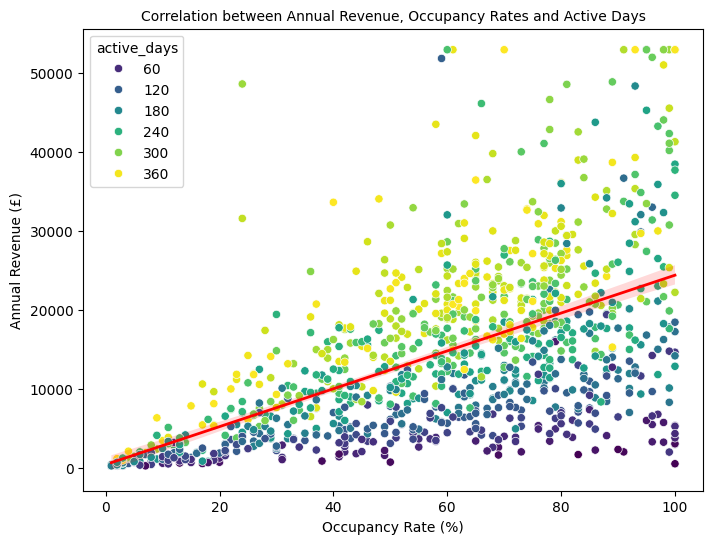

In [11]:
#scatterplot to show correlation between occupancy and revenue
plt.figure(figsize = (8, 6))
plt.title('Correlation between Annual Revenue, Occupancy Rates and Active Days', fontsize=10)

sns.scatterplot(data=data, x= 'occupancy', y='year_revenue', hue='active_days', palette='viridis')

sns.regplot(data=data, x='occupancy', y='year_revenue', scatter=False, color='red', line_kws={'linewidth': 2, 'label': 'Trendline'})

plt.xlabel('Occupancy Rate (%)')
plt.ylabel('Annual Revenue (£)')

We can assume that annual revenue is highly depedent on the active days. Adding these in the model may cause multicollinearity, which may
- distort model interpretability
- inflate the importance of these correlated features
- reduce generalisation

Revenue = avg_daily_rate × active_days × occupancy

It is then decided that we will focus on Occupancy rate ('occupancy') as the target variable as revenue outcomes are directly influenced by occupancy rate and it is less affected by the number of active days the property is listed (corr = 0.07).
> **We will be using occupancy_group ( >= 63% High, <63% Low) as the target variable.**

We will exclude "active_days", and features that are associated with this variable, These are:
* "is_active" (whether the listing is currently active at the time of data retrival)
* "blocked_days" (the number of days the property is not available for listing as determined by the property manager)

Analysis of impact: Exclusion of these feature will not impact upon the objectives of the study which focusses on property characteristics as opposed to property availability.





#### Feature Imbalance

In [12]:
print(data['beachfront'].value_counts())
print(data['ev_charger'].value_counts())
print(data['smoking_allowed'].value_counts())

beachfront
No     1048
Yes       6
Name: count, dtype: int64
ev_charger
No     1034
Yes      20
Name: count, dtype: int64
smoking_allowed
No     1034
Yes      20
Name: count, dtype: int64


Due to extreme class inbalances, these features are statistically unreliable for modelling and risks overfitting and added noise. These features will be dropped.

###**5.4. Data Pre-processing**



In [13]:
#using cleaned original dataset (not encoded)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   town               1054 non-null   object 
 1   year_revenue       1054 non-null   int64  
 2   avg_daily_rate     1054 non-null   float64
 3   occupancy          1054 non-null   int64  
 4   active_days        1054 non-null   int64  
 5   length_of_stay     1054 non-null   float64
 6   min_stay           1054 non-null   int64  
 7   management         1054 non-null   object 
 8   bedrooms           1054 non-null   int64  
 9   bathrooms          1054 non-null   float64
 10  max_guests         1054 non-null   int64  
 11  listed_price       1054 non-null   int64  
 12  is_active          1054 non-null   object 
 13  economic_category  1054 non-null   object 
 14  blocked_days       1054 non-null   int64  
 15  rating             1054 non-null   float64
 16  num_reviews        1054 

In [304]:
df = data.copy()

In [305]:
# Exclude multicollinear/redundant features
drop_cols = ['occupancy', 'year_revenue', 'active_days', 'blocked_days', 'is_active', 'revenue_group', 'beachfront', 'smoking_allowed', 'ev_charger']
df = df.drop(columns=drop_cols)

### Convert binary columns to Booleans

In [306]:
#convert Yes/No columns to boolean
yes_no_cols = ['hot_tub', 'kitchen', 'pool', 'pets_allowed']

for col in yes_no_cols:
  df[col]=df[col].map({'Yes':1, 'No': 0}).astype('bool')


In [307]:
#checking conversion
df.head()

,town,avg_daily_rate,length_of_stay,min_stay,management,bedrooms,bathrooms,max_guests,listed_price,economic_category,rating,num_reviews,hot_tub,kitchen,pool,pets_allowed,occupancy_group
0,Grays,113.31,5.0,4,Moderate,2,1.0,5,130,Upscale,4.86,0,False,True,False,True,Low
1,Grays,119.41,5.0,1,Large,2,2.0,4,152,Upscale,4.42,0,False,True,False,False,Low
2,Grays,156.73,4.0,2,Moderate,2,2.0,5,175,Upscale,5.00,4,False,True,False,False,Low
3,Grays,86.08,6.0,2,Large,2,1.0,5,128,Midscale,4.86,0,False,True,False,False,Low
4,Grays,103.58,4.0,3,Small,2,1.0,4,121,Midscale,4.86,0,False,True,False,False,Low


###Apply One-Hot Encoding to Cateogorical variables

In [308]:
categorical_cols = ['town', 'management', 'economic_category']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



In [309]:
#format all column names to lower case
df.columns = [col.replace(' ', '_').replace('-', '_').lower() for col in df.columns]
df.head()

,avg_daily_rate,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,rating,num_reviews,hot_tub,...,town_grays,town_saffron_walden,town_southend_on_sea,town_walton_on_naze,management_large,management_moderate,management_small,management_unknown,economic_category_midscale,economic_category_upscale
0,113.31,5.0,4,2,1.0,5,130,4.86,0,False,...,True,False,False,False,False,True,False,False,False,True
1,119.41,5.0,1,2,2.0,4,152,4.42,0,False,...,True,False,False,False,True,False,False,False,False,True
2,156.73,4.0,2,2,2.0,5,175,5.00,4,False,...,True,False,False,False,False,True,False,False,False,True
3,86.08,6.0,2,2,1.0,5,128,4.86,0,False,...,True,False,False,False,True,False,False,False,True,False
4,103.58,4.0,3,2,1.0,4,121,4.86,0,False,...,True,False,False,False,False,False,True,False,True,False


In [310]:
#checking feature pre-processing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_daily_rate              1054 non-null   float64
 1   length_of_stay              1054 non-null   float64
 2   min_stay                    1054 non-null   int64  
 3   bedrooms                    1054 non-null   int64  
 4   bathrooms                   1054 non-null   float64
 5   max_guests                  1054 non-null   int64  
 6   listed_price                1054 non-null   int64  
 7   rating                      1054 non-null   float64
 8   num_reviews                 1054 non-null   int64  
 9   hot_tub                     1054 non-null   bool   
 10  kitchen                     1054 non-null   bool   
 11  pool                        1054 non-null   bool   
 12  pets_allowed                1054 non-null   bool   
 13  occupancy_group             1054 

### Preprocessing Target Variable ('occupancy_group')

The target variable ('occupancy_group) will be encoded as

**Low** (i.e < 63% occupancy) = 0

**High** (i.e >= 63%) = 1

In [311]:
df['occupancy_group'] = df['occupancy_group'].map({'Low': 0, 'High': 1})


In [312]:
df['occupancy_group']

,occupancy_group
0,0
1,0
2,0
3,0
4,0
...,...
1049,1
1050,1
1051,1
1052,1


#### Checking for class imbalance in the target variable

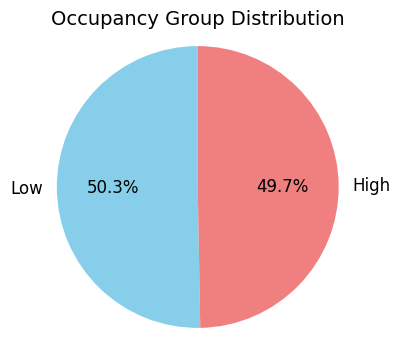

In [314]:
occupancy_counts = df['occupancy_group'].value_counts()
sizes = occupancy_counts.values
colors = ['skyblue', 'lightcoral']  # Customize as you like

# Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Occupancy Group Distribution', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

As the median was used to determine thresholds of occupancy rate, the target variable is balanced.


### **5.5. Splitting Dataset**

The data set is split into the train, validation and test sets.

In [315]:
X = df.drop(['occupancy_group'], axis=1)  #drop the target variable
y = df[['occupancy_group']]

In [316]:
X = df.drop(columns=['occupancy_group'])
y = df['occupancy_group']

In [317]:
#splitting the data into train, val and test sets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [318]:
print(f"X_train:{X_train.shape}")
print(f"y_train:{y_train.shape}")
print(f"X_test:{X_test.shape}")
print(f"y_test:{y_test.shape}")
print(f"X_val:{X_val.shape}")
print(f"y_val:{y_val.shape}")

X_train:(737, 26)
y_train:(737,)
X_test:(159, 26)
y_test:(159,)
X_val:(158, 26)
y_val:(158,)


### **5.6. Feature Scaling**


In [319]:
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_cols].head()

,avg_daily_rate,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,rating,num_reviews
824,81.50,21.0,1,3,1.0,5,93,4.86,0
1017,82.35,24.0,3,3,1.5,6,123,4.73,15
800,107.65,10.0,1,3,2.0,3,149,4.86,0
531,264.80,3.0,1,2,1.0,6,293,5.00,2
463,89.43,6.0,3,2,1.0,4,112,4.92,13


In [320]:
col_to_scale = ['avg_daily_rate', 'length_of_stay', 'min_stay','bedrooms', 'bathrooms','max_guests','listed_price', 'rating', 'num_reviews' ]
scaler = StandardScaler()
X_train[col_to_scale] = scaler.fit_transform(X_train[col_to_scale])
X_test[col_to_scale] = scaler.fit_transform(X_test[col_to_scale])
X_val[col_to_scale] = scaler.fit_transform(X_val[col_to_scale])

#### Checking scaling

In [321]:
X_train[col_to_scale].head()

,avg_daily_rate,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,rating,num_reviews
824,-0.727481,1.342193,-1.008245,1.346468,-0.797822,-0.008335,-0.881776,0.317941,-0.547576
1017,-0.706244,1.721437,0.469044,1.346468,0.094431,0.759546,-0.253681,0.035074,-0.237174
800,-0.074138,-0.048370,-1.008245,1.346468,0.986684,-1.544097,0.290668,0.317941,-0.547576
531,3.852166,-0.933274,-1.008245,-0.742684,-0.797822,0.759546,3.305523,0.622567,-0.506189
463,-0.529354,-0.554030,0.469044,-0.742684,-0.797822,-0.776216,-0.483982,0.448495,-0.278561


In [322]:
X_test[col_to_scale].head()

,avg_daily_rate,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,rating,num_reviews
250,0.640676,-0.875931,-0.945696,-0.727218,0.923379,-0.757774,0.548565,0.466895,-0.135751
768,0.396981,-0.773825,-0.182418,1.375103,-0.773931,0.777080,-0.129135,-0.302836,0.099255
78,-0.709618,-0.773825,-0.945696,-0.727218,-0.773931,0.777080,-0.898417,-0.012049,-0.117673
468,-0.091326,2.187259,-0.945696,-0.727218,-0.773931,-0.757774,0.383719,0.535315,-0.497298
618,-0.311866,-0.467506,-0.182418,-0.727218,0.074724,0.777080,-0.477144,0.449790,0.930813


In [323]:
X_val[col_to_scale].head()


,avg_daily_rate,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,rating,num_reviews
416,-0.664539,-0.998445,-0.941438,-0.836017,-0.70901,0.480846,-0.736229,-0.001172,0.642629
404,-1.370964,-0.428111,-0.941438,-0.836017,-0.70901,-0.852025,-1.449874,0.210470,2.968420
36,-1.139329,2.537623,-0.283264,-0.836017,-0.70901,-0.852025,-0.817788,0.422112,-0.156862
113,-1.003780,0.142222,-0.283264,-0.836017,-0.70901,-0.852025,-1.082857,0.395657,-0.447586
422,-0.200533,-0.770311,-0.283264,-0.836017,-0.70901,-0.185590,-0.450771,-0.159904,0.012727


In [324]:
assert (X_train.dtypes == X_test.dtypes).all()

In [325]:
assert (X_test.dtypes == X_val.dtypes).all()

In [326]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 737 entries, 824 to 171
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_daily_rate              737 non-null    float64
 1   length_of_stay              737 non-null    float64
 2   min_stay                    737 non-null    float64
 3   bedrooms                    737 non-null    float64
 4   bathrooms                   737 non-null    float64
 5   max_guests                  737 non-null    float64
 6   listed_price                737 non-null    float64
 7   rating                      737 non-null    float64
 8   num_reviews                 737 non-null    float64
 9   hot_tub                     737 non-null    bool   
 10  kitchen                     737 non-null    bool   
 11  pool                        737 non-null    bool   
 12  pets_allowed                737 non-null    bool   
 13  town_chelmsford             737 non-nu

## **6. Predictive Modelling and Hyperparameter Tuning**

As this is a classification problem,  the following machine learning algorithms will be used build the model.

- Logistic Regression
- Decision Trees
- Random Forest
- Support Vector Machines (SVM)
- K-Nearest Neighbours
- Neural Networks

In [327]:
def report_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(classification_report(y_true, y_pred))

###**6.1. Logistic Regression**

In [328]:
#Building the model
logreg = LogisticRegression(max_iter=5000, random_state=42)
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_val)
logreg_prob = logreg.predict_proba(X_val)[:, 1]


In [329]:
#Tuning with GridSearchCV
logreg = LogisticRegression(solver='liblinear')
logreg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

logreg_tuned = GridSearchCV(logreg, logreg_params, cv=5, scoring='roc_auc')
logreg_tuned .fit(X_train, y_train)

best_logreg = logreg_tuned.best_estimator_

print("Best Logistic Regression Params:", logreg_tuned .best_params_)
print("Best ROC AUC (LogReg):", logreg_tuned .best_score_)

Best Logistic Regression Params: {'C': 1, 'penalty': 'l1'}
Best ROC AUC (LogReg): 0.6796033767940468


In [330]:
report_model("Logistic Regression", y_val, logreg_preds)
report_model("Logistic Regression (Tuned)", y_val, logreg_tuned_preds)


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66        79
           1       0.66      0.65      0.65        79

    accuracy                           0.66       158
   macro avg       0.66      0.66      0.66       158
weighted avg       0.66      0.66      0.66       158


Logistic Regression (Tuned) Evaluation:
              precision    recall  f1-score   support

           0       0.69      0.68      0.69        79
           1       0.69      0.70      0.69        79

    accuracy                           0.69       158
   macro avg       0.69      0.69      0.69       158
weighted avg       0.69      0.69      0.69       158



### **6.2.Random Forest**

In [331]:
#Building the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)
rf_prob = rf.predict_proba(X_val)[:, 1]


In [332]:
#Tuning with GridSearchCV

rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_tuned = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc', n_jobs=-1)
rf_tuned.fit(X_train, y_train)


print("Best Random Forest Params:", rf_tuned.best_params_)
print("Best ROC AUC (RF):", rf_tuned.best_score_)

Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best ROC AUC (RF): 0.755345974630684


In [333]:
best_rf = rf_tuned.best_estimator_

In [334]:
report_model("Random Forest", y_val, rf_preds)
report_model("Random Forest (Tuned)", y_val, rf_tuned_preds)


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        79
           1       0.68      0.68      0.68        79

    accuracy                           0.68       158
   macro avg       0.68      0.68      0.68       158
weighted avg       0.68      0.68      0.68       158


Random Forest (Tuned) Evaluation:
              precision    recall  f1-score   support

           0       0.68      0.57      0.62        79
           1       0.63      0.73      0.68        79

    accuracy                           0.65       158
   macro avg       0.66      0.65      0.65       158
weighted avg       0.66      0.65      0.65       158



### **6.3. Support Vector Machines**

In [335]:
#Building the model
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_val)
svm_prob = svm.predict_proba(X_val)[:, 1]


In [336]:
#Tuning with GridSearchCV
svm = SVC(probability=True)
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_tuned = GridSearchCV(svm, svm_params, cv=5, scoring='roc_auc', n_jobs=-1)
svm_tuned.fit(X_train, y_train)

best_svm = svm_tuned.best_estimator_


print("Best SVM Params:", svm_tuned.best_params_)
print("Best ROC AUC (SVM):", svm_tuned.best_score_)

Best SVM Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best ROC AUC (SVM): 0.6999036793179703


In [337]:
report_model("Support Vector Machines", y_val, svm_preds)
report_model("Support Vector Machines (Tuned)", y_val, svm_tuned_preds)


Support Vector Machines Evaluation:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        79
           1       0.69      0.72      0.70        79

    accuracy                           0.70       158
   macro avg       0.70      0.70      0.70       158
weighted avg       0.70      0.70      0.70       158


Support Vector Machines (Tuned) Evaluation:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70        79
           1       0.70      0.71      0.70        79

    accuracy                           0.70       158
   macro avg       0.70      0.70      0.70       158
weighted avg       0.70      0.70      0.70       158



### **6.4. K-Nearest Neighbour**

In [338]:
#Building the model
knn =KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_val)
knn_prob = knn.predict_proba(X_val)[:, 1]

In [339]:
param_grid = {
    'n_neighbors': list(range(3, 21)),  # Try k from 3 to 20
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_tuned = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc')
knn_tuned.fit(X_train, y_train)

# Best params and model
print("Best KNN Params:", knn_tuned.best_params_)


Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [340]:
best_knn = knn_tuned.best_estimator_

In [341]:
report_model("K-Nearest Neighbors", y_val, knn_preds)
report_model("K-Nearest Neighbors (Tuned)", y_val, knn_tuned_preds)


K-Nearest Neighbors Evaluation:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        79
           1       0.68      0.56      0.61        79

    accuracy                           0.65       158
   macro avg       0.65      0.65      0.64       158
weighted avg       0.65      0.65      0.64       158


K-Nearest Neighbors (Tuned) Evaluation:
              precision    recall  f1-score   support

           0       0.64      0.63      0.64        79
           1       0.64      0.65      0.64        79

    accuracy                           0.64       158
   macro avg       0.64      0.64      0.64       158
weighted avg       0.64      0.64      0.64       158



### **6.5. Neural Networks**

In [343]:
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten

def create_model(optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(
    model=create_model,
    optimizer='adam',
    dropout_rate=0.3,
    batch_size=32,
    epochs=10
)

param_dist = {
    'optimizer': ['adam'],
    'dropout_rate': [0.0, 0.2, 0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [10,25]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

random_search_result = random_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4929 - loss: 0.7165
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5130 - loss: 0.6971
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5210 - loss: 0.6867
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5441 - loss: 0.6825
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5957 - loss: 0.6704
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5817 - loss: 0.6699
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5920 - loss: 0.6643
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6410 - loss: 0.6338
Epoch 9/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6303 - loss: 0.6320
Epoch 10/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6258 - loss: 0.6324
Epoch 11/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6474 - loss: 0.6140
Epoch 12/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6504 - lo

In [344]:
best_nn = random_search_result.best_estimator_
random_search_result

RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(batch_size=32, dropout_rate=0.3, epochs=10, model=<function create_model at 0x7ee3e3c76fc0>, optimizer='adam'),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'batch_size': [32, 64],
                                        'dropout_rate': [0.0, 0.2, 0.3, 0.5],
                                        'epochs': [10, 25],
                                        'optimizer': ['adam']},
                   random_state=42, scoring='roc_auc')

In [347]:
y_pred_best_nn = best_nn.predict(X_val)
y_pred_best_prob_nn = best_nn.predict_proba(X_val)[:, 1]
print("Accuracy of the model: {}%".format(accuracy(y_val, y_pred_best_nn)))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Accuracy of the model: 65.19%


## **7. Model Evaluation - Comparing the Models**

### **7.1. Confusion Matrix**

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


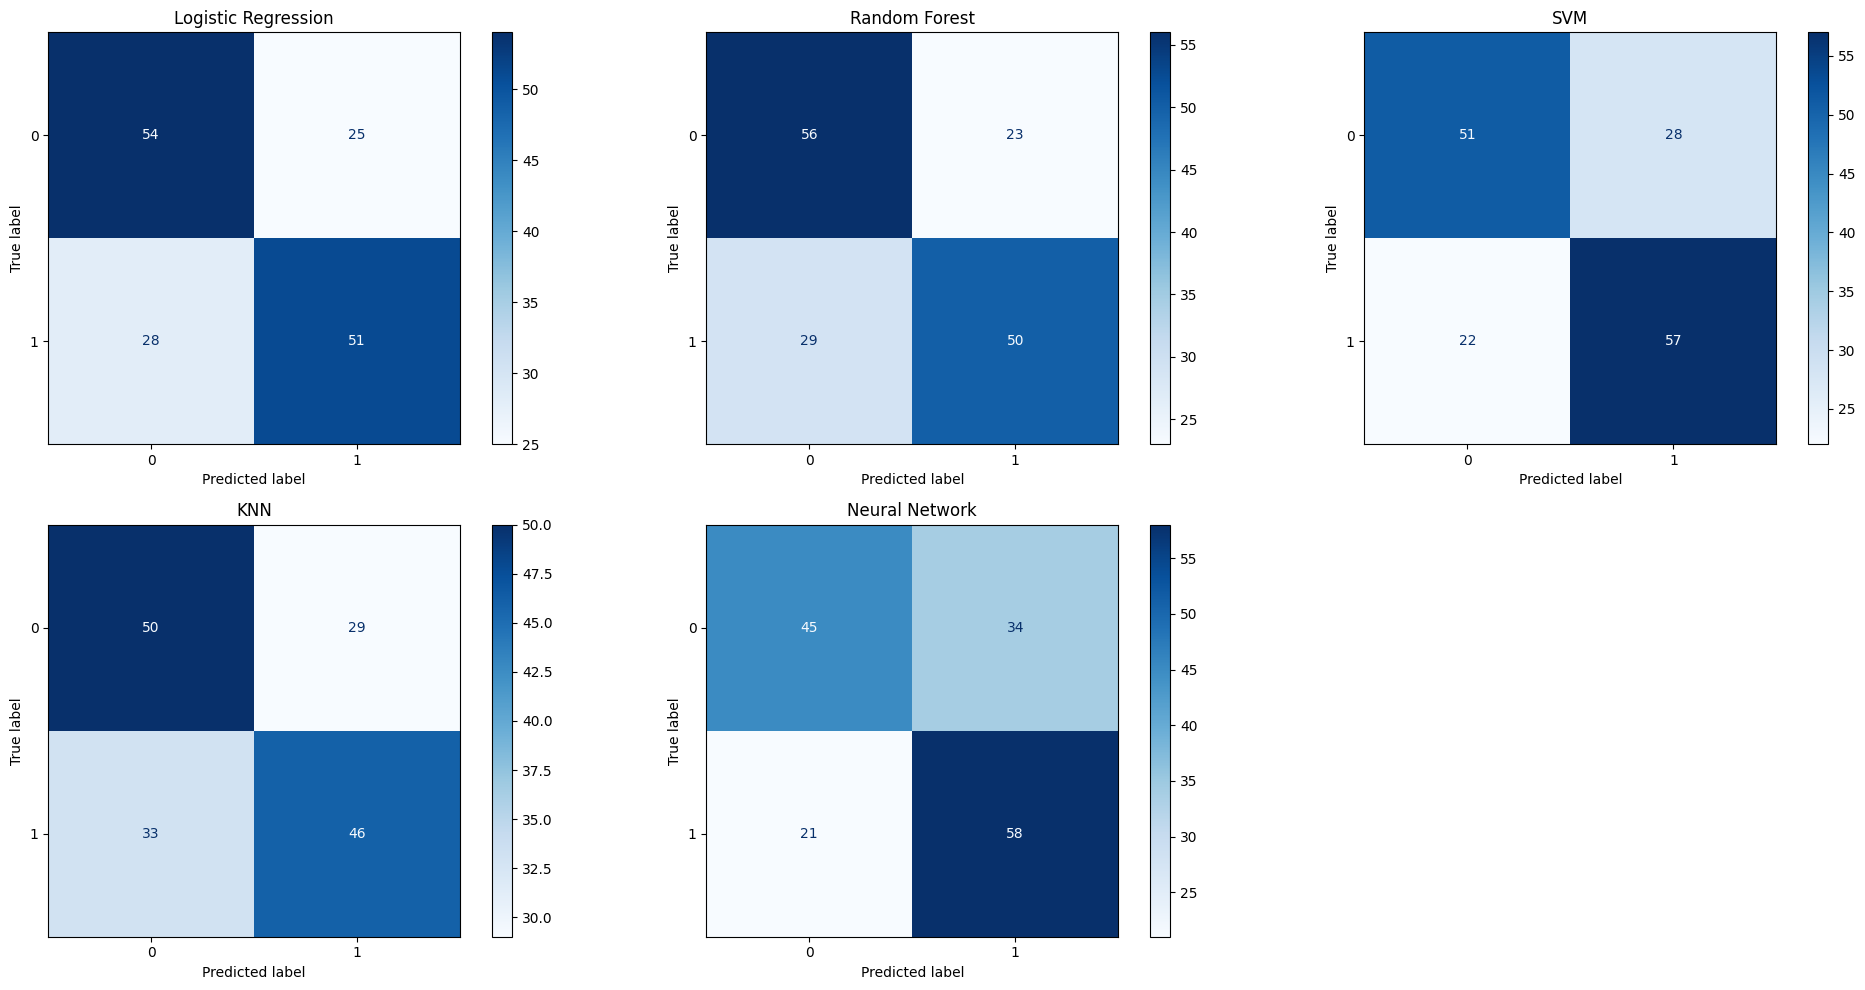

In [349]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions (thresholded for NN)
nn_preds = (best_nn.predict(X_val) > 0.5).astype("int32")

# Set up figure
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 rows, 3 columns
axes = axes.flatten()
fig.delaxes(axes[-1])

# Models and predictions
models = {
    "Logistic Regression": best_logreg.predict(X_val),
    "Random Forest": best_rf.predict(X_val),
    "SVM": best_svm.predict(X_val),
    "KNN": best_knn.predict(X_val),
    "Neural Network": nn_preds
}

# Plot each confusion matrix
for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(name)

plt.tight_layout()
plt.show()

#### **Confusion Matrix Analysis**
To gain a deeper understanding of model performance, confusion matrices were evaluated for each classifier. These matrices show how accurately each model predicted properties as either high or low occupancy.

The Logistic Regression model correctly classified 105 listings (54 low and 51 high) but made 53 misclassifications (25 false highs and 28 false lows). While slightly better at detecting low occupancy, the model’s errors are fairly evenly distributed.

The Random Forest model correctly identified 106 listings (56 low and 50 high), but made 52 misclassfication. It had the lowest number of false highs (23). This suggests the model was more aggressive in predicting low occupancy.

The SVM model showed slightly improved to Logistic Regression, correctly classifying marginally the most with 108 listings (51 low, 57 high), and misclassifying 50. It is better at detecting high occupancy properties both also false high occupanies,  which implies greater sensitvity  with less precision.

KNN was the worst performing model, with only 96 correct predictions.

Neural Networks had a fair 103 correct predictions. However it had the highest false 'high' ratings, which may have serious financial implications for the company.

Overall, SVM produced the highest number of true positives (57), which is important when high occupancy is the more desirable class to predict accurately. However, its elevated false positive rate suggests the model is more optimistic than precise. In terms of implications of extreme

We would then have to consider other metrics to determine best model.

### **7.2. Precision-Recall Curves**

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 


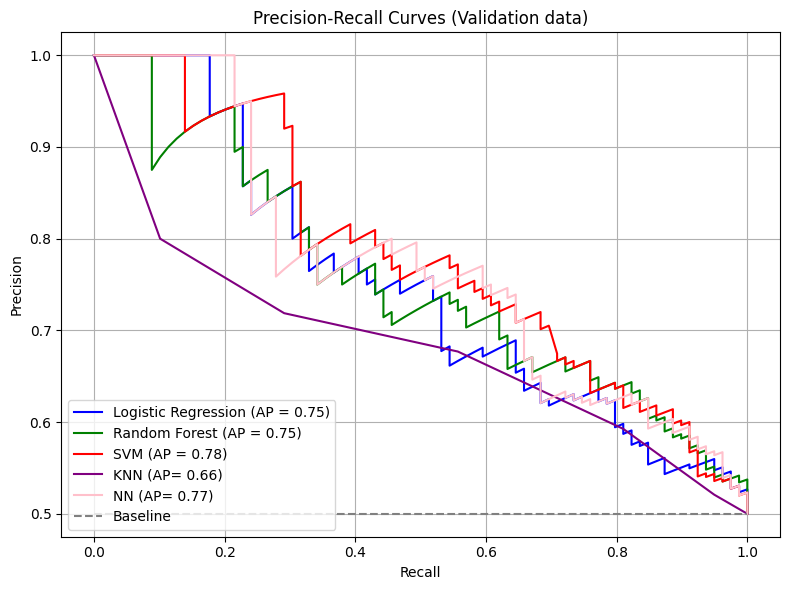

In [351]:
# Get precision-recall values for each model
precision_logreg, recall_logreg, _ = precision_recall_curve(y_val, best_logreg.predict_proba(X_val)[:, 1])
precision_rf, recall_rf, _ = precision_recall_curve(y_val, best_rf.predict_proba(X_val)[:, 1])
precision_svm, recall_svm, _ = precision_recall_curve(y_val, best_svm.predict_proba(X_val)[:, 1])
precision_knn, recall_knn,_ = precision_recall_curve(y_val, knn.predict_proba(X_val)[:, 1])
precision_nn, recall_nn,_ = precision_recall_curve(y_val, best_nn.predict_proba(X_val)[:, 1])

# Calculate average precision score (area under the PR curve)
ap_logreg = average_precision_score(y_val, best_logreg.predict_proba(X_val)[:, 1])
ap_rf = average_precision_score(y_val, best_rf.predict_proba(X_val)[:, 1])
ap_svm = average_precision_score(y_val, best_svm.predict_proba(X_val)[:, 1])
ap_knn = average_precision_score(y_val,best_knn.predict_proba(X_val)[:, 1])
ap_nn = average_precision_score(y_val,best_nn.predict_proba(X_val)[:, 1])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall_logreg, precision_logreg, label=f'Logistic Regression (AP = {ap_logreg:.2f})', color='blue')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {ap_rf:.2f})', color='green')
plt.plot(recall_svm, precision_svm, label=f'SVM (AP = {ap_svm:.2f})', color='red')
plt.plot(recall_knn, precision_knn, label=f'KNN (AP= {ap_knn:.2f})', color='purple')
plt.plot(recall_nn, precision_nn, label=f'NN (AP= {ap_nn:.2f})', color='pink')



# Reference line (average prevalence)
baseline = sum(y_val) / len(y_val)
plt.hlines(baseline, xmin=0, xmax=1, colors='gray', linestyles='--', label='Baseline')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (Validation data)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Precision-Recall Curve Analysis**
The Precision-Recall (PR) curves further highlight how well each model handles the trade-off between precision (positive predictive value) and recall (sensitivity). This is especially important in slightly imbalanced datasets such as this,  where ROC curves alone may not provide the full picture.

Apart from KNN, the other models are showing close values. The Support Vector Machine (SVM) model marginally achieved the highest average precision (AP = 0.78), followed closely by the Neural Network (AP = 0.77). Logistic Regression and Random Forest performed similarly (AP = 0.75 each), indicating stable baseline performance. The K-Nearest Neighbors (KNN) model showed the lowest performance (AP = 0.66).

These findings highlight SVM and Neural Networks as the most effective models for precision-focused classification tasks, particularly valuable when minimizing false positives is critical.

###**ROC AUC Scores**

In [352]:
#  Compare ROC AUC
print("\nROC AUC Scores:")
print("Logistic Regression", roc_auc_score(y_val, best_logreg.predict_proba(X_val)[:, 1]))
print("Random Forest:", roc_auc_score(y_val, best_rf.predict_proba(X_val)[:, 1]))
print("SVM:", roc_auc_score(y_val, best_svm.predict_proba(X_val)[:, 1]))
print("KNN", roc_auc_score(y_val, best_knn.predict_proba(X_val)[:, 1]))
print("NN", roc_auc_score(y_val, best_nn.predict_proba(X_val)[:, 1]))


ROC AUC Scores:
Logistic Regression 0.7234417561288256
Random Forest: 0.7460342893767025
SVM: 0.7618971318698927
KNN 0.6788174971959622
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
NN 0.7518025957378625


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 


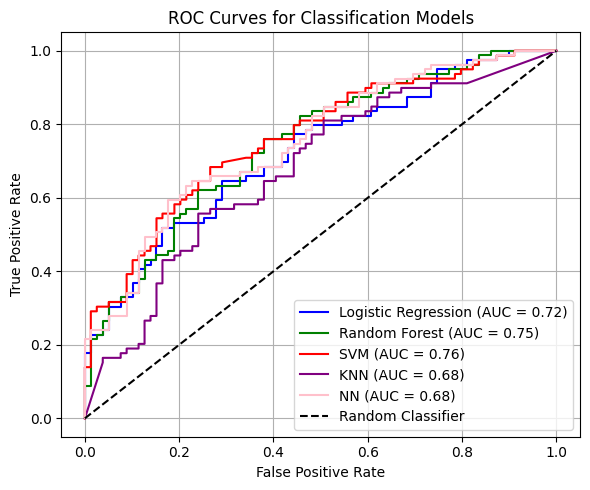

In [353]:

# Get ROC curve values for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_val, best_logreg.predict_proba(X_val)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_val, best_rf.predict_proba(X_val)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_val, best_svm.predict_proba(X_val)[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_val, best_knn.predict_proba(X_val)[:, 1])
fpr_nn, tpr_nn, _ = roc_curve(y_val, best_nn.predict_proba(X_val)[:, 1])

auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)
auc_knn = auc(fpr_knn, tpr_knn)
auc_nn = auc(fpr_nn, tpr_nn)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='red')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', color='purple')
plt.plot(fpr_nn, tpr_nn, label=f'NN (AUC = {auc_knn:.2f})', color='pink')


# Reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

####**ROC Curve Analysis**
SVM performed best in terms of distinguishing between classes overall.

Random Forest and Logistic Regression also performed reasonably well.

KNN and Neural Network underperformed in comparison — their ROC curves are closer to the baseline, indicating poorer discrimination.

### **7.3. Heatmap Analysis**

In [372]:

 #Step 1: Store baseline and tuned models
models = {
    "Logistic (Baseline)": logreg,
    "Logistic (Tuned)": best_logreg,
    "Random Forest (Baseline)": rf,
    "Random Forest (Tuned)": best_rf,
    "SVM (Baseline)": svm,
    "SVM (Tuned)": best_svm,
    "KNN (Baseline)": knn,
    "KNN (Tuned)": best_knn,
    "NN (Tuned)": best_nn
}

# Step 2: Evaluate all models
results = []

for name, model in models.items():
    # Check if it's the Keras model
    if "NN" in name:
        y_proba = model.predict(X_val).flatten()  # single column output
        y_pred = (y_proba > 0.5).astype("int32")   # threshold to get binary labels
    else:
        y_pred = model.predict(X_val)
        y_proba = model.predict_proba(X_val)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1 Score": f1_score(y_val, y_pred),
        "ROC AUC": roc_auc_score(y_val, y_proba)
    })

results_df = pd.DataFrame(results).set_index("Model")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


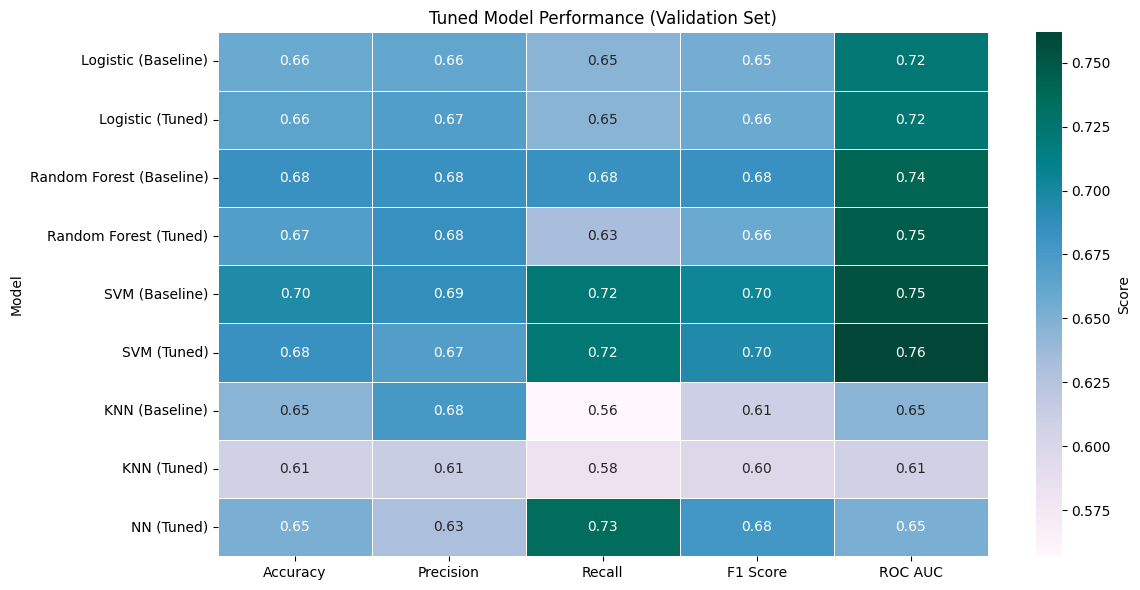

In [373]:
plt.figure(figsize=(12, 6))
sns.heatmap(results_df, annot=True, fmt=".2f", cmap='PuBuGn', linewidths=0.5, cbar_kws={'label': 'Score'})
plt.title("Tuned Model Performance (Validation Set)")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Key Findings**
1. Tuning improved scores maginally

All three models show slight improvements after hyperparameter tuning, especially in Recall, F1 Score, and ROC AUC.

Example:
Random Forest improved Recall from 0.70 → 0.73

SVM improved Accuracy from 0.68 → 0.70

Logistic Regression remained stable in ROC AUC (0.77), showing it was already well-calibrated.

2. Best Performing Model Overall → Logistic Regression

Logistic Regression (both baseline and tuned) achieved the highest ROC AUC score (0.77) — indicating strong discriminative ability between 'High' and 'Low' occupancy classes.

It also consistently performs well across Accuracy (0.70), Precision (0.71), and F1 Score (0.70).

Even though its recall is slightly lower (0.68–0.70), its overall balance makes it a robust model.

3. SVM Performs Well After Tuning

Tuned SVM matches Logistic Regression in Accuracy (0.70) and gets close in ROC AUC (0.75). SVC (tuned) performs better than Logistic Regression in recall, which is an important consideration to reduce missed high-occupancy properties.


4. Random Forest Shows Most Improvement Post-Tuning

While its baseline performance was weakest, tuning gave Random Forest the biggest lift — particularly in Recall (0.70 → 0.73) and F1 Score (0.65 → 0.68).

May be a better choice if recall is a priority, e.g., ensuring high-occupancy properties aren't missed.

**Final Recommendation:**


For balance between performance and generalisation, particular with recall, **SVM (tuned)** will be selected as the best performing model.




### **Cross-validation**

In [366]:
# Define your tuned SVM model
# Best SVM Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
tuned_svm = SVC(C=1, gamma='auto', kernel='rbf', probability=True, random_state=42)

# Create pipeline to standardize features and fit model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', tuned_svm)
])

# Set up stratified k-fold (stratified maintains class balance)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate cross-validation scores with ROC AUC
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='roc_auc')

# Print the scores
print("Cross-Validated ROC AUC Scores:", cv_scores)
print("Mean ROC AUC:", np.mean(cv_scores).round(3))
print("Standard Deviation:", np.std(cv_scores).round(3))

Cross-Validated ROC AUC Scores: [0.71018992 0.67817352 0.69215106 0.70399852 0.59811181]
Mean ROC AUC: 0.677
Standard Deviation: 0.041


#### **Model Validation via K-Fold Cross-Validation**

Moderate performance:

An ROC AUC of 0.677 suggests that the model is better than random guessing (which would be 0.5), but still has room for improvement.

This could be acceptable depending on the problem context (e.g., business use case, class imbalance, etc.).

⚠️ Some variability across folds:

A std. dev. of 0.041 isn’t huge, but the dip to 0.5981 in one fold indicates potential instability — maybe due to:

- small sample size in that fold

- noise or outliers

- model overfitting on certain splits